# evaluation_6.ipynb
4/2/24

The point of this notebook is to evaluate the models we are sticking to for BoG, we have classification models that have been trained, one ctst model, 2 multitasking (same training but equal epochs and best epoch)

In [1]:
#we have our saved models, but it seems the number of batches is incorrect for some reason on the ctst model, let's load it in and see the size
import torch
path = '/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt'
a = torch.load(path)
print(a.shape)

torch.Size([105252, 161])


In [2]:
path2 = '/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt'
b = torch.load(path2)
print(b.shape)

torch.Size([105252, 161])


In [3]:
#maybe we just suck at math? they are indeed the same, 33097 epochs for ctst and 206 for mult
datapoints = 206*512 #512 batch size
datapoints2 = 33097*512/161
print(datapoints, datapoints2) #actually almost perfect

105472 105252.57142857143


In [4]:
#let's see if any rows in a are all 0
a[-1,:] #no?

tensor([ 8.9965e-01,  8.5672e-01,  4.8435e-01,  4.2047e-01, -1.3732e-01,
         5.1497e-01,  3.2882e-01,  3.8358e-01,  8.4491e-01,  7.7258e-01,
         7.0258e-01,  7.2423e-01,  9.9516e-01,  8.8127e-01,  6.4699e-01,
        -6.7907e-01,  7.0232e-01,  7.2190e-01,  3.5514e-01,  5.9176e-01,
         3.4964e-01,  1.3820e+00,  6.7883e-01,  5.6018e-01,  1.8900e-02,
        -3.9739e-01,  2.6116e-01,  5.0241e-01,  6.8626e-01,  6.6334e-01,
         6.7485e-01,  9.2958e-01,  1.3291e-01,  6.7250e-01,  1.1986e-01,
         4.5570e-01,  3.7688e-01, -4.6957e-02, -2.4507e-01,  7.9430e-01,
        -1.0000e+01, -1.0000e+01,  8.3162e-02,  5.1429e-02, -1.0000e+01,
        -2.2501e-01,  1.6246e-01, -4.7546e-01,  3.2315e-01, -1.9102e-01,
        -8.3058e-01, -3.8951e-01, -3.5274e-01,  2.7595e-01,  4.5553e-01,
        -3.4936e-01, -3.7151e-01, -5.8791e-01,  8.0415e-01, -6.6900e-01,
        -3.7274e-01,  6.4472e-02, -7.0612e-01, -4.8655e-01, -4.0503e-01,
        -6.9835e-01, -1.0186e-01, -1.0057e-01, -1.0

In [5]:
for i in range(0, a.shape[0]):
    if torch.sum(a[i,:]) == 0:
        print(i)

In [6]:
total_batches = 33097
batch_size = 512

# Minimum and maximum number of data points
min_data_points = (total_batches - 1) * batch_size
max_data_points = total_batches * batch_size

(min_data_points, max_data_points)

(16945152, 16945664)

In [7]:
#our total is expected to be
105252*161 #this is in between the maximum, that would make sense?
#so then why is total number / 161 ... oh that's why, because it isn't quite that amount, we are good, just bad at math
#will be under because that calculation assumes full batches, is almost full but will be slightly under! actually is almost perfect lol, we're good!

16945572

In [27]:
#now that we know it's correct let's load in all the data
import torch
ctst_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_reg.pt')
ctst_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_class.pt')
ctst_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_predicts_reg.pt')
ctst_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/ctst_bestepoch_targets_class.pt')

mult_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_reg.pt')
mult_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_reg.pt')
mult_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_targets_class.pt')
mult_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_bestepoch_predicts_class.pt')

mult2_target_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_reg.pt')
mult2_pred_reg = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_reg.pt')
mult2_target_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_targets_class.pt')
mult2_pred_class = torch.load('/data/leslie/sarthak/hyena/hyena-dna/evals/results/multitasking_25epoch_predicts_class.pt')

print(ctst_target_reg.shape, ctst_target_class.shape, ctst_pred_reg.shape, ctst_target_class.shape)
print(mult_target_reg.shape, mult_pred_reg.shape, mult_target_class.shape, mult_pred_class.shape) #all are identical as expected

torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])
torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161]) torch.Size([105252, 161])


In [28]:
#now make sure all the targets are identical for the reg and class
print(torch.all(ctst_target_reg == mult_target_reg))
print(torch.all(mult_target_reg == mult2_target_reg))
#perfect!
print(torch.all(ctst_target_class == mult_target_class))
print(torch.all(mult_target_class == mult2_target_class))

tensor(True)
tensor(True)
tensor(True)
tensor(True)


In [12]:
#now set a true targets since only need 1
t_class = ctst_target_class
t_reg = ctst_target_reg

In [13]:
#now we can calculate the metrics
#first let's find the correlation per row for the regression
from scipy.stats import pearsonr
import numpy as np
from tqdm import tqdm
correlations_ctst = []
correlations_mult = []
correlations_mult2 = []
for i in tqdm(range(0, t_reg.shape[0])):
    corr, _ = pearsonr(t_reg[i,:], ctst_pred_reg[i,:])
    correlations_ctst.append(corr)
    corr, _ = pearsonr(t_reg[i,:], mult_pred_reg[i,:])
    correlations_mult.append(corr)
    corr, _ = pearsonr(t_reg[i,:], mult2_pred_reg[i,:])
    correlations_mult2.append(corr)

100%|██████████| 105252/105252 [05:21<00:00, 326.95it/s]


0.35206027416423563 0.3812119883769906 0.3455480938625804


Text(0.5, 1.0, 'Distribution of Correlations across celltypes for each CRE')

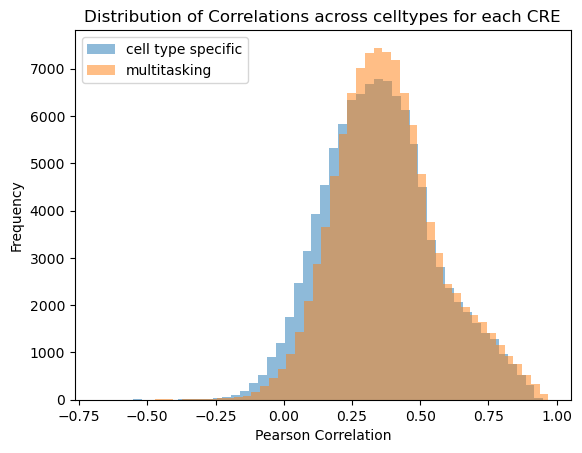

In [24]:
print(np.mean(correlations_ctst), np.mean(correlations_mult), np.mean(correlations_mult2))
#we can also now plot the distribution of correlations using histogram
import matplotlib.pyplot as plt
plt.hist(correlations_ctst, bins=50, alpha=0.5, label='cell type specific')
plt.hist(correlations_mult, bins=50, alpha=0.5, label='multitasking')
# plt.hist(correlations_mult2, bins=50, alpha=0.25, label='mult2', color='red')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across celltypes for each CRE')

0.35206027416423563 0.3812119883769906 0.3455480938625804


Text(0.5, 1.0, 'Distribution of Correlations across celltypes for each CRE')

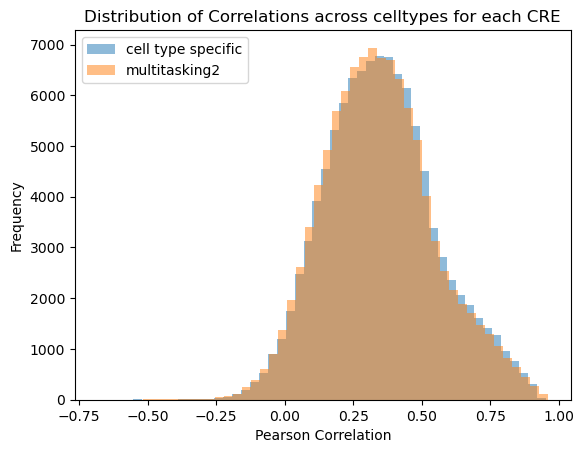

In [54]:
print(np.mean(correlations_ctst), np.mean(correlations_mult), np.mean(correlations_mult2))
#we can also now plot the distribution of correlations using histogram
import matplotlib.pyplot as plt
plt.hist(correlations_ctst, bins=50, alpha=0.5, label='cell type specific')
# plt.hist(correlations_mult, bins=50, alpha=0.5, label='multitasking')
plt.hist(correlations_mult2, bins=50, alpha=0.5, label='multitasking2')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across celltypes for each CRE')

In [16]:
#we can repeat but for each column
correlations_ctst_col = []
correlations_mult_col = []
correlations_mult2_col = []
for i in tqdm(range(0, t_reg.shape[1])):
    corr, _ = pearsonr(t_reg[:,i], ctst_pred_reg[:,i])
    correlations_ctst_col.append(corr)
    corr, _ = pearsonr(t_reg[:,i], mult_pred_reg[:,i])
    correlations_mult_col.append(corr)
    corr, _ = pearsonr(t_reg[:,i], mult2_pred_reg[:,i])
    correlations_mult2_col.append(corr)

100%|██████████| 161/161 [00:02<00:00, 74.95it/s]


0.5677409366582157 0.5849791364919308 0.5555383985661052


Text(0.5, 1.0, 'Distribution of Correlations across CREs for each celltype')

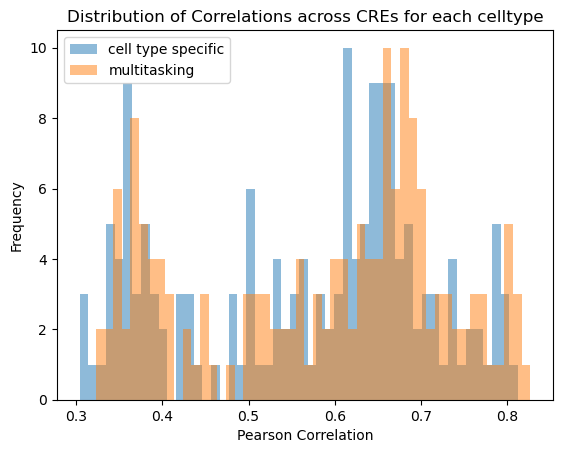

In [25]:
#same histogram
print(np.mean(correlations_ctst_col), np.mean(correlations_mult_col), np.mean(correlations_mult2_col))
plt.hist(correlations_ctst_col, bins=50, alpha=0.5, label='cell type specific')
plt.hist(correlations_mult_col, bins=50, alpha=0.5, label='multitasking')
# plt.hist(correlations_mult2_col, bins=50, alpha=0.5, label='mult2')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across CREs for each celltype')

0.5677409366582157 0.5849791364919308 0.5555383985661052


Text(0.5, 1.0, 'Distribution of Correlations across CREs for each celltype')

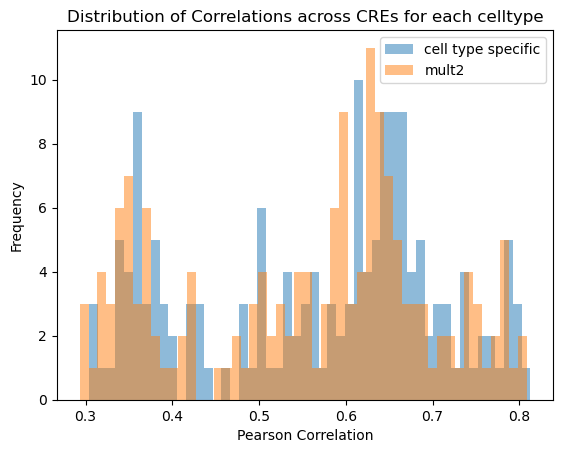

In [55]:
#same histogram
print(np.mean(correlations_ctst_col), np.mean(correlations_mult_col), np.mean(correlations_mult2_col))
plt.hist(correlations_ctst_col, bins=50, alpha=0.5, label='cell type specific')
# plt.hist(correlations_mult_col, bins=50, alpha=0.5, label='multitasking')
plt.hist(correlations_mult2_col, bins=50, alpha=0.5, label='mult2')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across CREs for each celltype')

In [29]:
#now let's do classification, using auroc and auprc
from sklearn.metrics import roc_auc_score, average_precision_score
auroc_ctst = []
auprc_ctst = []
auroc_mult = []
auprc_mult = []
auroc_mult2 = []
auprc_mult2 = []
for i in tqdm(range(0, t_class.shape[0])):
    auroc_ctst.append(roc_auc_score(t_class[i,:], ctst_pred_class[i,:]))
    auprc_ctst.append(average_precision_score(t_class[i,:], ctst_pred_class[i,:]))
    auroc_mult.append(roc_auc_score(t_class[i,:], mult_pred_class[i,:]))
    auprc_mult.append(average_precision_score(t_class[i,:], mult_pred_class[i,:]))
    auroc_mult2.append(roc_auc_score(t_class[i,:], mult2_pred_class[i,:]))
    auprc_mult2.append(average_precision_score(t_class[i,:], mult2_pred_class[i,:]))

print(np.mean(auroc_ctst), np.mean(auprc_ctst))
print(np.mean(auroc_mult), np.mean(auprc_mult))

  0%|          | 8/105252 [00:00<36:24, 48.17it/s]  


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [30]:
#and for columns
auroc_ctst_col = []
auprc_ctst_col = []
auroc_mult_col = []
auprc_mult_col = []
auroc_mult2_col = []
auprc_mult2_col = []
for i in tqdm(range(0, t_class.shape[1])):
    auroc_ctst_col.append(roc_auc_score(t_class[:,i], ctst_pred_class[:,i]))
    auprc_ctst_col.append(average_precision_score(t_class[:,i], ctst_pred_class[:,i]))
    auroc_mult_col.append(roc_auc_score(t_class[:,i], mult_pred_class[:,i]))
    auprc_mult_col.append(average_precision_score(t_class[:,i], mult_pred_class[:,i]))
    auroc_mult2_col.append(roc_auc_score(t_class[:,i], mult2_pred_class[:,i]))
    auprc_mult2_col.append(average_precision_score(t_class[:,i], mult2_pred_class[:,i]))


100%|██████████| 161/161 [00:30<00:00,  5.36it/s]

0.84188462499261 0.9873067745289396
0.8466353020494992 0.9878031923421121


In [31]:
print(np.mean(auroc_ctst_col), np.mean(auprc_ctst_col))
print(np.mean(auroc_mult_col), np.mean(auprc_mult_col))
print(np.mean(auroc_mult2_col), np.mean(auprc_mult2_col))

0.84188462499261 0.9873067745289396
0.8466353020494992 0.9878031923421121
0.8396143086038419 0.9870611898894817


In [32]:
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_ctst, tpr_ctst, _ = roc_curve(t_class.flatten(), ctst_pred_class.flatten())
roc_auc_ctst = auc(fpr_ctst, tpr_ctst)
fpr_mult, tpr_mult, _ = roc_curve(t_class.flatten(), mult_pred_class.flatten())
roc_auc_mult = auc(fpr_mult, tpr_mult)
fpr_mult2, tpr_mult2, _ = roc_curve(t_class.flatten(), mult2_pred_class.flatten())
roc_auc_mult2 = auc(fpr_mult2, tpr_mult2)

Text(0.5, 0.5, 'AUC = 0.92')

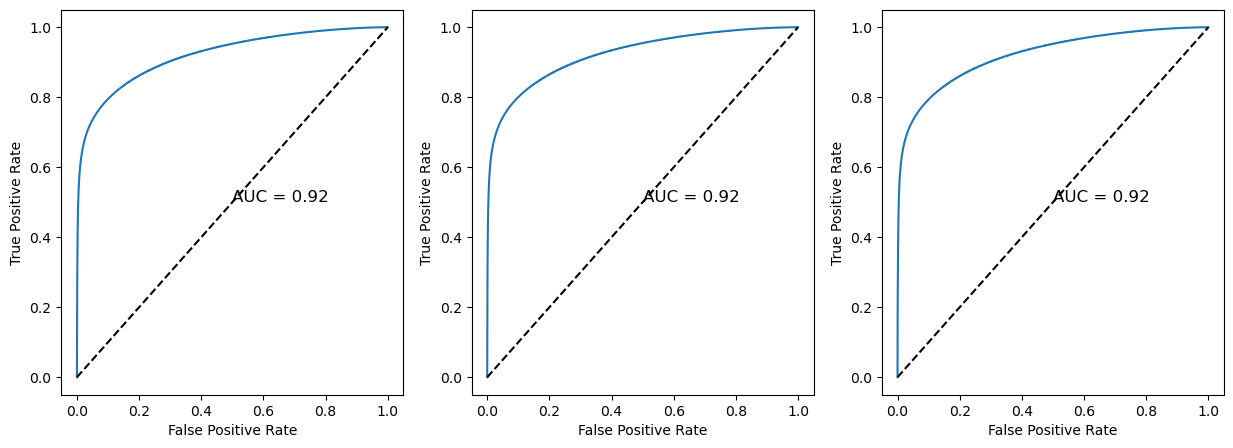

In [35]:
#now do it in subplots
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(fpr_ctst, tpr_ctst, label='Cell Type Specific (area = %0.2f)' % roc_auc_ctst)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#add text with the auc
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_ctst, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 2)
plt.plot(fpr_mult, tpr_mult, label='Multitasking (area = %0.2f)' % roc_auc_mult)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_mult, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 3)
plt.plot(fpr_mult2, tpr_mult2, label='Multitasking2 (area = %0.2f)' % roc_auc_mult2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_mult2, fontsize=12)
# plt.legend()

In [36]:
print(ctst_pred_class[0])
print(mult_pred_class[0]) #clearly not identical at all

tensor([-3.3213, -3.1327, -2.9344, -1.4124, -2.0665, -1.9086, -1.4348, -2.7131,
        -2.4667, -1.7092, -2.0113, -2.8204, -3.0653, -1.6670, -2.2904, -3.3883,
        -3.1804, -3.2928, -3.5978, -1.7688, -2.5580, -3.8657, -2.4523, -2.7306,
        -2.9642, -3.7781, -2.2409, -3.3476, -2.5110, -3.9018, -1.8801, -3.7597,
        -2.2629, -4.0967, -2.2574, -2.1702, -2.1510,  0.0788, -3.1298, -2.8002,
        -3.4792, -3.7947, -3.1210, -3.2303, -4.1711, -2.2128, -2.3594, -3.0271,
        -2.4635, -3.3832, -3.4557, -1.4866, -2.4497, -0.4084, -2.4894, -1.9604,
        -1.0374, -0.7677, -1.5908, -2.8423, -0.6808, -0.7578, -1.6483, -0.9674,
        -2.1676,  0.8464,  0.1076, -0.5985, -2.4127, -3.2541, -2.9410,  0.1672,
        -3.0817, -1.5121, -0.4259, -0.5981, -0.0748, -0.4279, -3.1755, -3.1671,
        -3.5275,  0.2950,  0.1730, -0.5084, -1.2301,  0.1131, -0.3782, -0.7455,
        -1.9549, -2.0974, -2.6276, -1.9753,  0.0898, -3.0861,  0.0967, -3.0474,
        -3.1750, -0.9963, -1.0450, -3.34

In [58]:
#number of values below 0
print(torch.sum(ctst_pred_class < 0))
#print numel
print(torch.numel(ctst_pred_class))
#divide them
print(torch.sum(ctst_pred_class < 0)/torch.numel(ctst_pred_class))

tensor(4336547)
16945572
tensor(0.2559)


In [37]:
#now set positive class to 0
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_ctst, tpr_ctst, _ = roc_curve(t_class.flatten(), ctst_pred_class.flatten(), pos_label=0)
roc_auc_ctst = auc(fpr_ctst, tpr_ctst)
fpr_mult, tpr_mult, _ = roc_curve(t_class.flatten(), mult_pred_class.flatten(), pos_label=0)
roc_auc_mult = auc(fpr_mult, tpr_mult)
fpr_mult2, tpr_mult2, _ = roc_curve(t_class.flatten(), mult2_pred_class.flatten(), pos_label=0)
roc_auc_mult2 = auc(fpr_mult2, tpr_mult2)

Text(0.5, 0.5, 'AUC = 0.08')

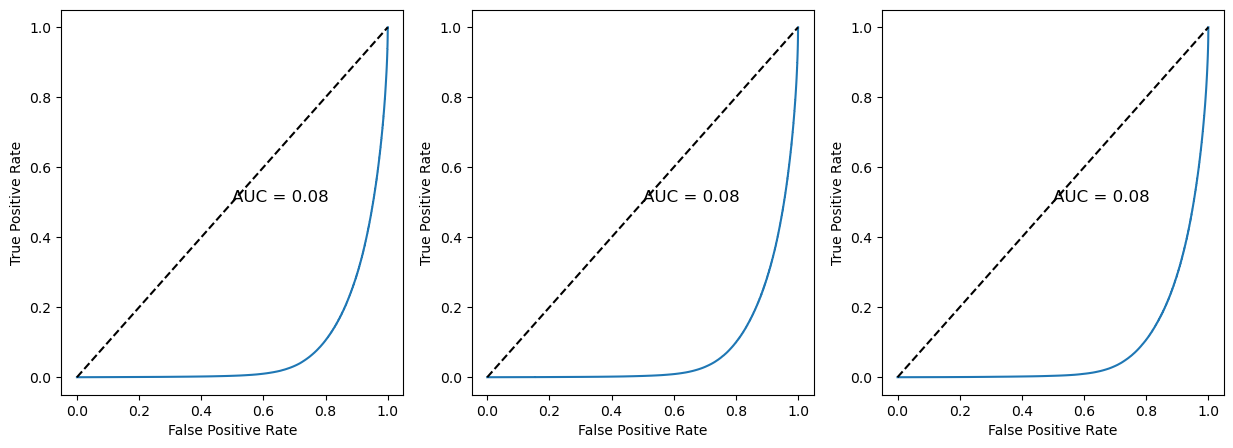

In [38]:
#and plot again
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(fpr_ctst, tpr_ctst, label='Cell Type Specific (area = %0.2f)' % roc_auc_ctst)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#add text with the auc
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_ctst, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 2)
plt.plot(fpr_mult, tpr_mult, label='Multitasking (area = %0.2f)' % roc_auc_mult)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_mult, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 3)
plt.plot(fpr_mult2, tpr_mult2, label='Multitasking2 (area = %0.2f)' % roc_auc_mult2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_mult2, fontsize=12)

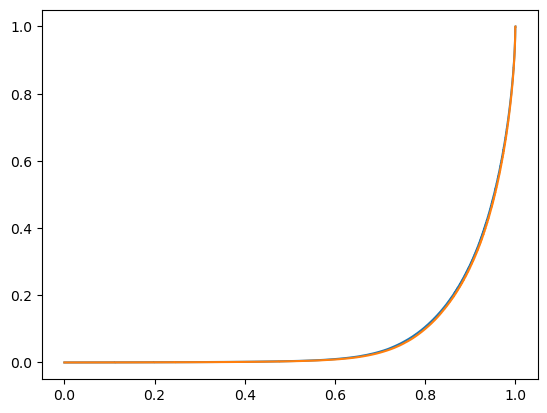

In [39]:
plt.plot(fpr_ctst, tpr_ctst, label='Cell Type Specific (area = %0.2f)' % roc_auc_ctst)
plt.plot(fpr_mult, tpr_mult, label='Multitasking (area = %0.2f)' % roc_auc_mult)
#they are different, just every so slightly

In [40]:
#finally let's do prc curves
from sklearn.metrics import precision_recall_curve
precision_ctst, recall_ctst, _ = precision_recall_curve(t_class.flatten(), ctst_pred_class.flatten(), pos_label=0)
precision_mult, recall_mult, _ = precision_recall_curve(t_class.flatten(), mult_pred_class.flatten(), pos_label=0)
precision_mult2, recall_mult2, _ = precision_recall_curve(t_class.flatten(), mult2_pred_class.flatten(), pos_label=0)

Text(0.5, 1.0, 'Precision Recall Curve')

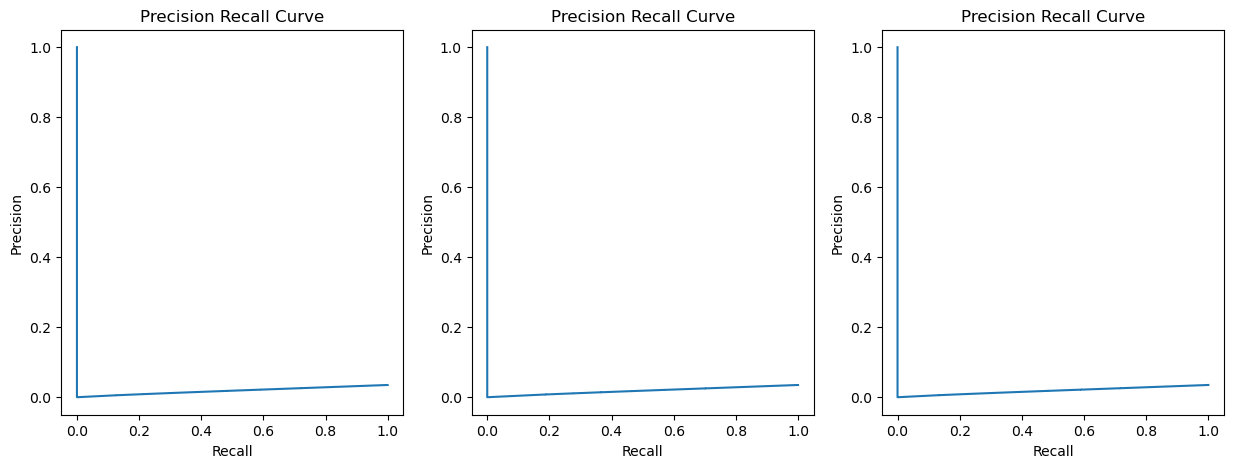

In [42]:
#and plot in subplots
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(recall_ctst, precision_ctst, label='Cell Type Specific')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()

plt.subplot(1, 3, 2)
plt.plot(recall_mult, precision_mult, label='Multitasking')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()

plt.subplot(1, 3, 3)
plt.plot(recall_mult2, precision_mult2, label='Multitasking2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()

#uhhhhhhhhh, yeah idk

Text(0.5, 1.0, 'Precision Recall Curve')

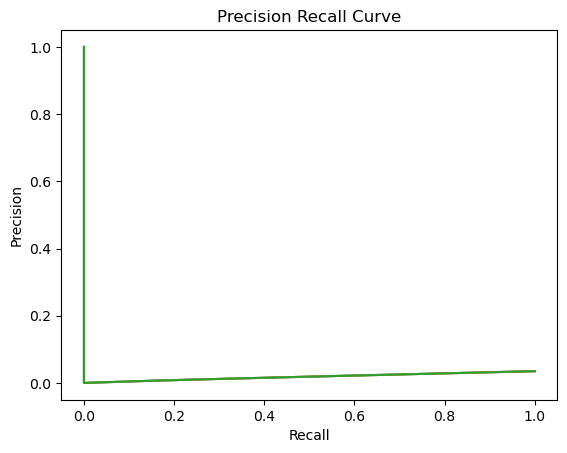

In [44]:
#these are still very very bad, plot together
plt.plot(recall_ctst, precision_ctst, label='Cell Type Specific')
plt.plot(recall_mult, precision_mult, label='Multitasking')
plt.plot(recall_mult2, precision_mult2, label='Multitasking2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()
#again basically identical and basically useless and terrible... uh oh

In [46]:
#final thing is to see the overall distributions of the regression plots, predicted vs true
#let's do a scatter plot
#also mask out the values if the target is -10
mask = t_reg != -10
print(mask)
# plt.scatter(t_reg[mask], ctst_pred_reg[mask], alpha=0.5, label='Cell Type Specific')

tensor([[False,  True, False,  ..., False,  True, False],
        [False,  True, False,  ..., False,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])


In [48]:
print(t_reg[mask], t_reg[mask].shape) #linearizes it too which is actually good

tensor([-0.4581, -1.8792, -2.3478,  ...,  0.1876,  0.8940, -1.0668]) torch.Size([16352624])


Text(0.5, 1.0, 'Regression Scatter Plot')

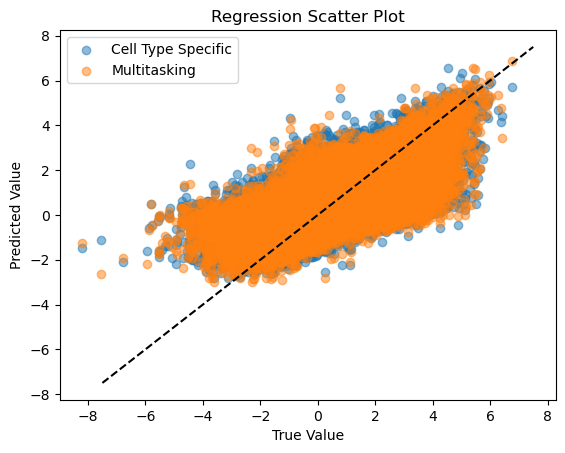

In [52]:
plt.scatter(t_reg[mask][::100], ctst_pred_reg[mask][::100], alpha=0.5, label='Cell Type Specific')
plt.scatter(t_reg[mask][::100], mult_pred_reg[mask][::100], alpha=0.5, label='Multitasking')
plt.legend()
#and the 11 line
plt.plot([-7.5, 7.5], [-7.5, 7.5], 'k--')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Regression Scatter Plot')

In [ ]:
#let's redo the roc curve but by using negative of the data
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_ctst, tpr_ctst, _ = roc_curve(t_reg[mask].flatten(), ctst_pred_reg[mask].flatten())
roc_auc_ctst = auc(fpr_ctst, tpr_ctst)
fpr_mult, tpr_mult, _ = roc_curve(t_reg[mask].flatten(), mult_pred_reg[mask].flatten())
roc_auc_mult = auc(fpr_mult, tpr_mult)
fpr_mult2, tpr_mult2, _ = roc_curve(t_reg[mask].flatten(), mult2_pred_reg[mask].flatten())
roc_auc_mult2 = auc(fpr_mult2, tpr_mult2)

Text(0.5, 1.0, 'Precision Recall Curve')

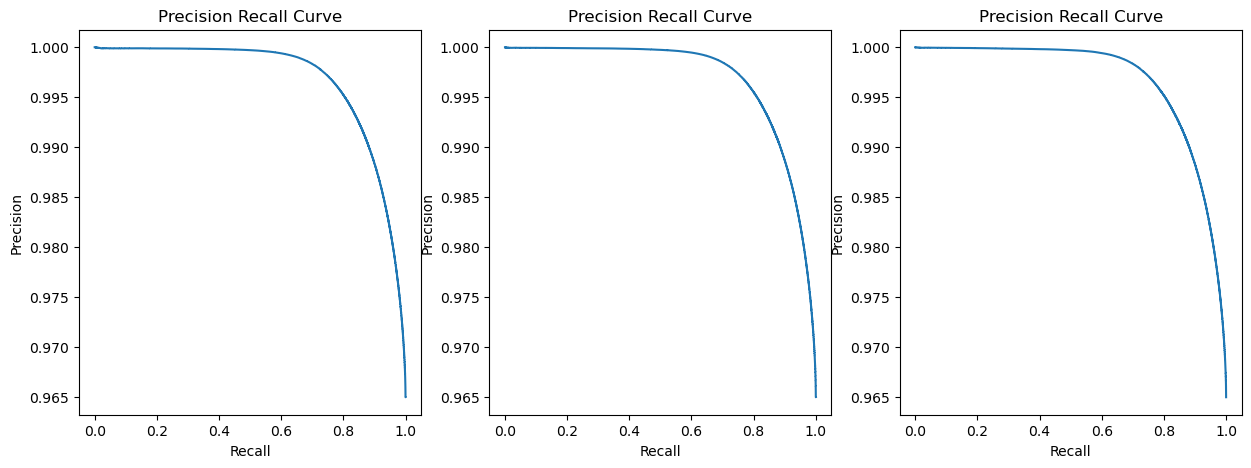

In [59]:
#finally let's do prc curves
from sklearn.metrics import precision_recall_curve
precision_ctst, recall_ctst, _ = precision_recall_curve(t_class.flatten(), ctst_pred_class.flatten(), pos_label=1)
precision_mult, recall_mult, _ = precision_recall_curve(t_class.flatten(), mult_pred_class.flatten(), pos_label=1)
precision_mult2, recall_mult2, _ = precision_recall_curve(t_class.flatten(), mult2_pred_class.flatten(), pos_label=1)
#and plot in subplots
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(recall_ctst, precision_ctst, label='Cell Type Specific')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()

plt.subplot(1, 3, 2)
plt.plot(recall_mult, precision_mult, label='Multitasking')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()

plt.subplot(1, 3, 3)
plt.plot(recall_mult2, precision_mult2, label='Multitasking2')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
# plt.legend()

#uhhhhhhhhh, yeah idk

In [61]:
#let's just test and make results that would be really good and then do the AUROC
#let's make a perfect prediction
perfect = torch.ones_like(t_class)*t_class+torch.randn_like(t_class)*0.1
print(perfect.shape, perfect)
#this model should be really goood, let's test it

torch.Size([105252, 161]) tensor([[-0.0895,  1.0882,  0.1531,  ...,  0.0638,  0.9608,  0.0190],
        [ 0.0576,  1.1476,  0.0475,  ..., -0.0134,  0.9560,  1.0715],
        [ 0.9490,  0.9254,  1.0015,  ...,  1.0447,  0.9007,  0.9879],
        ...,
        [ 0.9784,  0.9064,  1.1474,  ...,  1.1982,  0.9599,  0.9904],
        [ 0.9374,  1.2026,  0.8865,  ...,  1.0592,  1.0289,  0.8704],
        [ 0.9939,  0.9097,  0.9561,  ...,  1.1608,  0.9309,  1.0455]])


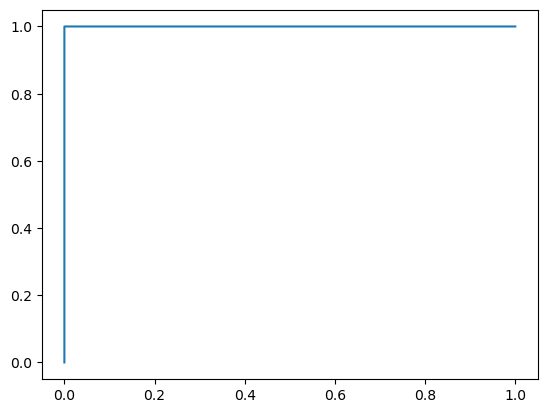

In [62]:
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_perfect, tpr_perfect, _ = roc_curve(t_class.flatten(), perfect.flatten())
roc_auc_perfect = auc(fpr_perfect, tpr_perfect)
plt.plot(fpr_perfect, tpr_perfect, label='Perfect (area = %0.2f)' % roc_auc_perfect)

In [63]:
print(roc_auc_perfect) #basically 1 since the noise doesn't change anything about the predictions, this makes sense and pos_label isn't 1

1.0


1.0000000000000002


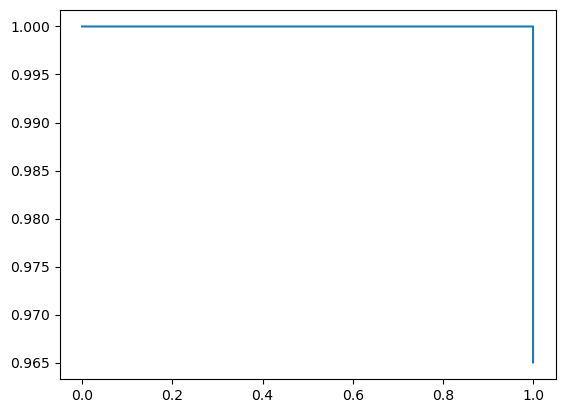

In [64]:
#now let's look at perfect prc
precision_perfect, recall_perfect, _ = precision_recall_curve(t_class.flatten(), perfect.flatten())
plt.plot(recall_perfect, precision_perfect, label='Perfect')
prcauc = auc(recall_perfect, precision_perfect)
print(prcauc) #again basically 1, this is good

In [69]:
#this is if model outputs close to 0 and 1, but what if it just predicts negatives for 0 and positives for 1
perfect2 = torch.ones_like(t_class)*t_class*100 + torch.ones_like(t_class)*np.abs(t_class-1)*-100
print(perfect2[:10,:10])

tensor([[-100.,  100., -100., -100.,  100., -100.,  100.,  100.,  100.,  100.],
        [-100.,  100., -100.,  100., -100., -100., -100., -100., -100.,  100.],
        [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.],
        [-100., -100., -100., -100., -100., -100., -100., -100., -100., -100.],
        [ 100.,  100.,  100., -100.,  100.,  100.,  100.,  100.,  100., -100.],
        [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.],
        [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.],
        [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.],
        [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.],
        [ 100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.,  100.]])


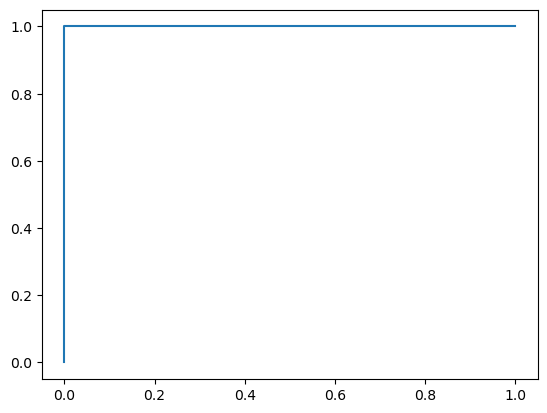

In [70]:
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_perfect, tpr_perfect, _ = roc_curve(t_class.flatten(), perfect2.flatten())
roc_auc_perfect = auc(fpr_perfect, tpr_perfect)
plt.plot(fpr_perfect, tpr_perfect, label='Perfect (area = %0.2f)' % roc_auc_perfect)

In [71]:
#let's mask it out and do the correaltions again
corr,_ = pearsonr(t_reg[mask].flatten(), ctst_pred_reg[mask].flatten())
print(f'ctst model: {corr}')
corr,_ = pearsonr(t_reg[mask].flatten(), mult_pred_reg[mask].flatten())
print(f'mult model: {corr}')
corr,_ = pearsonr(t_reg[mask].flatten(), mult2_pred_reg[mask].flatten())
print(f'mult2 model: {corr}')



ctst model: 0.6764393605136942
mult model: 0.6937860611894344
mult2 model: 0.6609158124201466


In [72]:
#again do it for each row/col but with the mask
correlations_ctst = []
correlations_mult = []
correlations_mult2 = []
for i in tqdm(range(0, t_reg.shape[0])):
    corr, _ = pearsonr(t_reg[i,:][mask[i,:]], ctst_pred_reg[i,:][mask[i,:]])
    correlations_ctst.append(corr)
    corr, _ = pearsonr(t_reg[i,:][mask[i,:]], mult_pred_reg[i,:][mask[i,:]])
    correlations_mult.append(corr)
    corr, _ = pearsonr(t_reg[i,:][mask[i,:]], mult2_pred_reg[i,:][mask[i,:]])
    correlations_mult2.append(corr)

100%|██████████| 105252/105252 [05:48<00:00, 301.59it/s]


0.46406090222543434 0.5015036697986048 0.44910774942215514


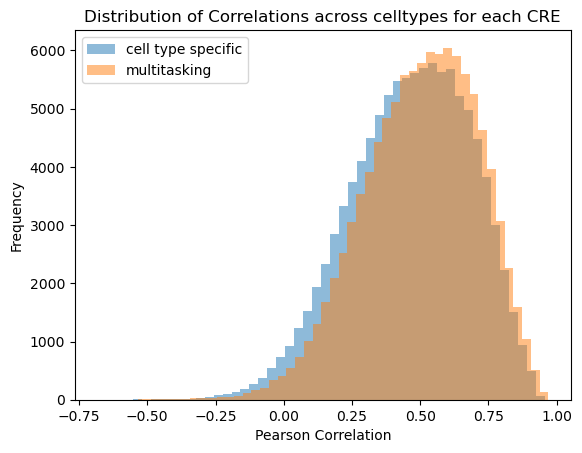

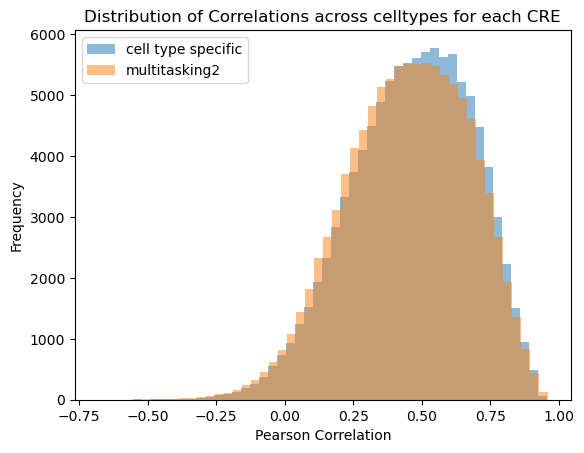

In [73]:
print(np.mean(correlations_ctst), np.mean(correlations_mult), np.mean(correlations_mult2))
#we can also now plot the distribution of correlations using histogram
# import matplotlib.pyplot as plt
plt.hist(correlations_ctst, bins=50, alpha=0.5, label='cell type specific')
plt.hist(correlations_mult, bins=50, alpha=0.5, label='multitasking')
# plt.hist(correlations_mult2, bins=50, alpha=0.25, label='mult2', color='red')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across celltypes for each CRE')
plt.show()
# print(np.mean(correlations_ctst), np.mean(correlations_mult), np.mean(correlations_mult2))
#we can also now plot the distribution of correlations using histogram
# import matplotlib.pyplot as plt
plt.hist(correlations_ctst, bins=50, alpha=0.5, label='cell type specific')
# plt.hist(correlations_mult, bins=50, alpha=0.5, label='multitasking')
plt.hist(correlations_mult2, bins=50, alpha=0.5, label='multitasking2')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across celltypes for each CRE')
plt.show()

In [74]:
#now per column
correlations_ctst_col = []
correlations_mult_col = []
correlations_mult2_col = []
for i in tqdm(range(0, t_reg.shape[1])):
    corr, _ = pearsonr(t_reg[:,i][mask[:,i]], ctst_pred_reg[:,i][mask[:,i]])
    correlations_ctst_col.append(corr)
    corr, _ = pearsonr(t_reg[:,i][mask[:,i]], mult_pred_reg[:,i][mask[:,i]])
    correlations_mult_col.append(corr)
    corr, _ = pearsonr(t_reg[:,i][mask[:,i]], mult2_pred_reg[:,i][mask[:,i]])
    correlations_mult2_col.append(corr)

100%|██████████| 161/161 [00:04<00:00, 39.48it/s]


0.6757472303527516 0.6960813883329713 0.6610203766579373


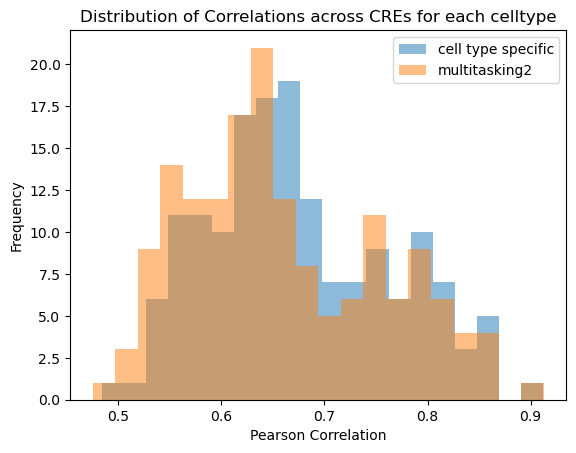

In [85]:
#and plot
print(np.mean(correlations_ctst_col), np.mean(correlations_mult_col), np.mean(correlations_mult2_col))
# plt.hist(correlations_ctst_col, bins=50, alpha=0.5, label='cell type specific')
# plt.hist(correlations_mult_col, bins=50, alpha=0.5, label='multitasking')

# plt.xlabel('Pearson Correlation')
# plt.ylabel('Frequency')
# plt.legend()
# plt.title('Distribution of Correlations across CREs for each celltype')
# plt.show()

plt.hist(correlations_ctst_col, bins=20, alpha=0.5, label='cell type specific')

plt.hist(correlations_mult2_col, bins=20, alpha=0.5, label='multitasking2')
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Correlations across CREs for each celltype')
plt.show()

In [77]:
#now let's returnt o classification,, first use sigmoid to get the values between 0 and 1
ctst_sigmoid = torch.sigmoid(ctst_pred_class)
mult_sigmoid = torch.sigmoid(mult_pred_class)
mult2_sigmoid = torch.sigmoid(mult2_pred_class)
print(ctst_sigmoid[:10,:10])

tensor([[0.0348, 0.0418, 0.0505, 0.1959, 0.1124, 0.1291, 0.1923, 0.0622, 0.0782,
         0.1533],
        [0.0955, 0.1223, 0.2883, 0.5836, 0.4960, 0.4772, 0.6273, 0.3216, 0.1610,
         0.5874],
        [0.0602, 0.0986, 0.0390, 0.1987, 0.0909, 0.1071, 0.1587, 0.1035, 0.0586,
         0.1988],
        [0.0452, 0.0774, 0.0148, 0.0656, 0.0228, 0.0493, 0.0431, 0.0514, 0.0454,
         0.0540],
        [0.4342, 0.5370, 0.8504, 0.9617, 0.9411, 0.9338, 0.9676, 0.9259, 0.7005,
         0.9743],
        [0.9409, 0.9287, 0.9750, 0.9951, 0.9905, 0.9924, 0.9953, 0.9861, 0.9777,
         0.9958],
        [0.4434, 0.4966, 0.9178, 0.9772, 0.9718, 0.9733, 0.9844, 0.9379, 0.8191,
         0.9860],
        [0.1908, 0.2311, 0.5934, 0.8857, 0.8225, 0.8473, 0.9195, 0.7656, 0.4336,
         0.9261],
        [0.9744, 0.9758, 0.9927, 0.9990, 0.9984, 0.9988, 0.9992, 0.9983, 0.9944,
         0.9996],
        [0.9867, 0.9890, 0.9968, 0.9995, 0.9992, 0.9993, 0.9996, 0.9990, 0.9964,
         0.9998]])


In [86]:
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_ctst, tpr_ctst, _ = roc_curve(t_class.flatten(), ctst_sigmoid.flatten())
roc_auc_ctst = auc(fpr_ctst, tpr_ctst)
fpr_mult, tpr_mult, _ = roc_curve(t_class.flatten(), mult_sigmoid.flatten())
roc_auc_mult = auc(fpr_mult, tpr_mult)
fpr_mult2, tpr_mult2, _ = roc_curve(t_class.flatten(), mult2_sigmoid.flatten())
roc_auc_mult2 = auc(fpr_mult2, tpr_mult2)

Text(0.5, 1.0, 'multitasking model (25 epochs)')

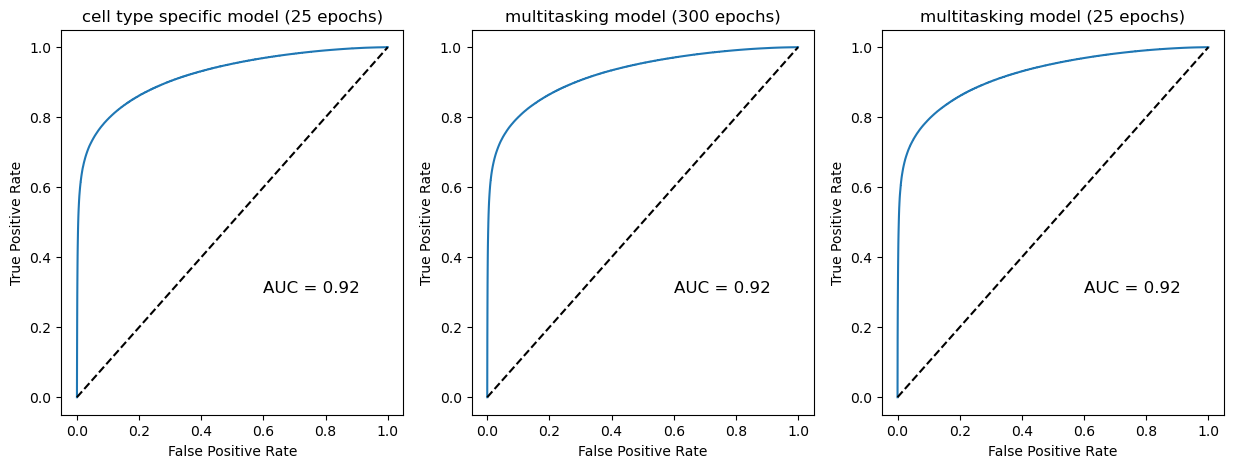

In [88]:
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(fpr_ctst, tpr_ctst, label='Cell Type Specific (area = %0.2f)' % roc_auc_ctst)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('cell type specific model (25 epochs)')
#add text with the auc
plt.text(0.6, 0.3, 'AUC = %0.2f' % roc_auc_ctst, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 2)
plt.plot(fpr_mult, tpr_mult, label='Multitasking (area = %0.2f)' % roc_auc_mult)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.6,0.3, 'AUC = %0.2f' % roc_auc_mult, fontsize=12)
plt.title('multitasking model (300 epochs)')
# plt.legend()

plt.subplot(1, 3, 3)
plt.plot(fpr_mult2, tpr_mult2, label='Multitasking2 (area = %0.2f)' % roc_auc_mult2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.6,0.3, 'AUC = %0.2f' % roc_auc_mult2, fontsize=12)
plt.title('multitasking model (25 epochs)')

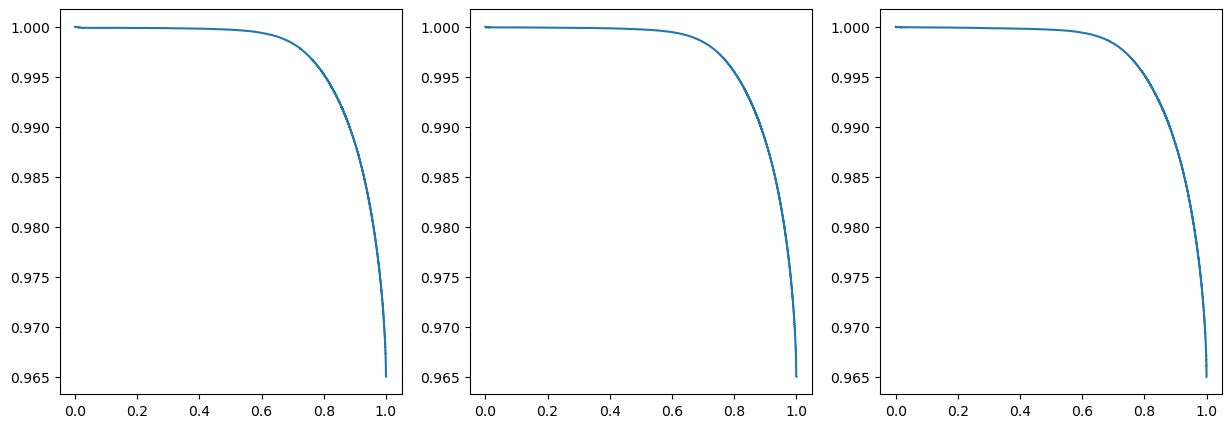

In [80]:
#and plot the prc
precision_ctst, recall_ctst, _ = precision_recall_curve(t_class.flatten(), ctst_sigmoid.flatten())
precision_mult, recall_mult, _ = precision_recall_curve(t_class.flatten(), mult_sigmoid.flatten())
precision_mult2, recall_mult2, _ = precision_recall_curve(t_class.flatten(), mult2_sigmoid.flatten())

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(recall_ctst, precision_ctst, label='Cell Type Specific')
plt.subplot(1, 3, 2)
plt.plot(recall_mult, precision_mult, label='Multitasking')
plt.subplot(1, 3, 3)
plt.plot(recall_mult2, precision_mult2, label='Multitasking2')

Text(0.5, 1.0, 'Multitasking (25 epochs)')

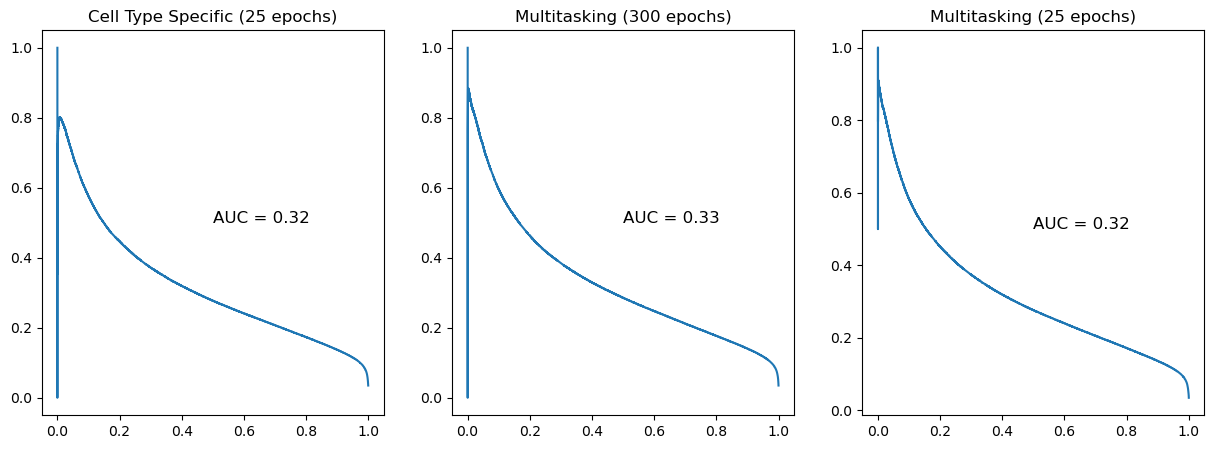

In [89]:
#and plot the prc with changing pos label but doing 1-prob
#this considers how well your model is at predicting the negative class, this is what we want!!
precision_ctst, recall_ctst, _ = precision_recall_curve(t_class.flatten(), 1-ctst_sigmoid.flatten(), pos_label=0)
precision_mult, recall_mult, _ = precision_recall_curve(t_class.flatten(), 1-mult_sigmoid.flatten(), pos_label=0)
precision_mult2, recall_mult2, _ = precision_recall_curve(t_class.flatten(), 1-mult2_sigmoid.flatten(), pos_label=0)

plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(recall_ctst, precision_ctst, label='Cell Type Specific')
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc(recall_ctst, precision_ctst), fontsize=12)
plt.title('Cell Type Specific (25 epochs)')
plt.subplot(1, 3, 2)
plt.plot(recall_mult, precision_mult, label='Multitasking')
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc(recall_mult, precision_mult), fontsize=12)
plt.title('Multitasking (300 epochs)')
plt.subplot(1, 3, 3)
plt.plot(recall_mult2, precision_mult2, label='Multitasking2')
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc(recall_mult2, precision_mult2), fontsize=12)
plt.title('Multitasking (25 epochs)')
#actually this does somehow look better?
#predicts all positive at that first threshold, slowly getting more negatives as you go along the curve, this is good and expected

array([0.5959596 , 0.60204082, 0.59793814, 0.59375   , 0.58947368,
       0.58510638, 0.58064516, 0.57608696, 0.57142857, 0.57777778,
       0.57303371, 0.57954545, 0.57471264, 0.56976744, 0.57647059,
       0.57142857, 0.56626506, 0.56097561, 0.55555556, 0.55      ,
       0.5443038 , 0.53846154, 0.53246753, 0.52631579, 0.53333333,
       0.54054054, 0.53424658, 0.52777778, 0.52112676, 0.51428571,
       0.50724638, 0.5       , 0.49253731, 0.48484848, 0.47692308,
       0.46875   , 0.47619048, 0.46774194, 0.45901639, 0.45      ,
       0.44067797, 0.44827586, 0.43859649, 0.42857143, 0.41818182,
       0.40740741, 0.39622642, 0.40384615, 0.39215686, 0.4       ,
       0.3877551 , 0.375     , 0.36170213, 0.34782609, 0.33333333,
       0.31818182, 0.30232558, 0.28571429, 0.26829268, 0.275     ,
       0.25641026, 0.23684211, 0.24324324, 0.22222222, 0.2       ,
       0.17647059, 0.15151515, 0.125     , 0.09677419, 0.1       ,
       0.06896552, 0.07142857, 0.07407407, 0.07692308, 0.04   

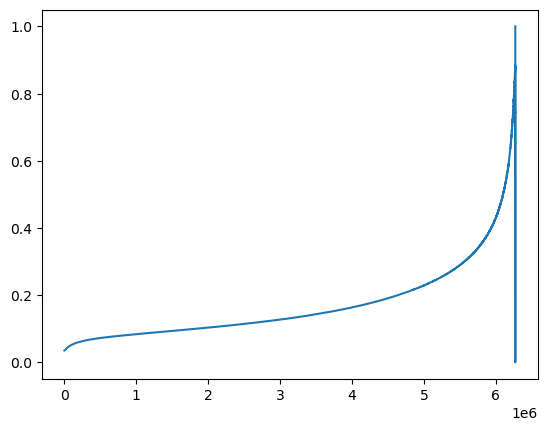

In [98]:
plt.plot(precision_mult)
precision_mult[-100:]

Text(0.5, 0.5, 'AUC = 0.92')

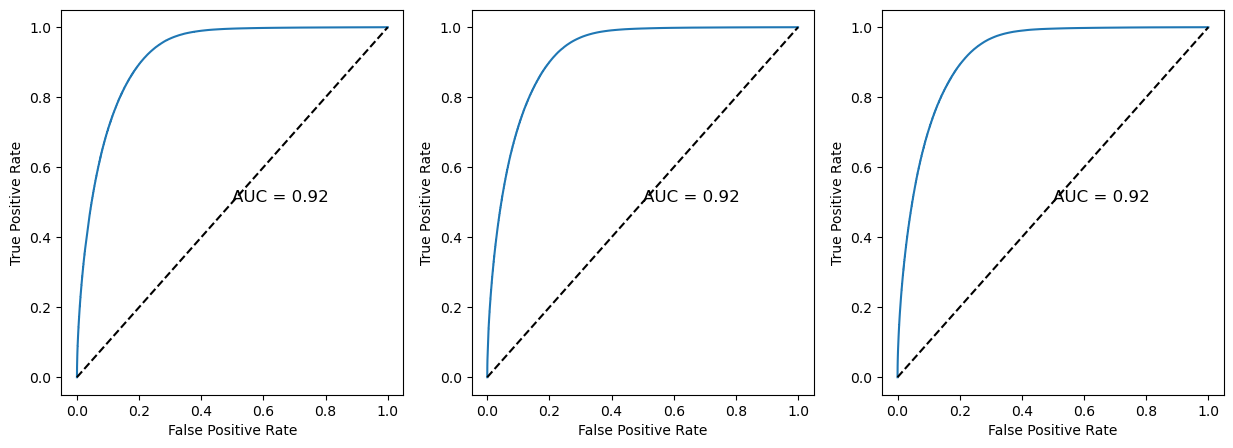

In [83]:
#now let's do overall roc curve
from sklearn.metrics import roc_curve, auc
fpr_ctst, tpr_ctst, _ = roc_curve(t_class.flatten(), 1-ctst_sigmoid.flatten(), pos_label=0)
roc_auc_ctst = auc(fpr_ctst, tpr_ctst)
fpr_mult, tpr_mult, _ = roc_curve(t_class.flatten(), 1-mult_sigmoid.flatten(), pos_label=0)
roc_auc_mult = auc(fpr_mult, tpr_mult)
fpr_mult2, tpr_mult2, _ = roc_curve(t_class.flatten(), 1-mult2_sigmoid.flatten(), pos_label=0)
roc_auc_mult2 = auc(fpr_mult2, tpr_mult2)
plt.subplots(1, 3, figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(fpr_ctst, tpr_ctst, label='Cell Type Specific (area = %0.2f)' % roc_auc_ctst)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#add text with the auc
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_ctst, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 2)
plt.plot(fpr_mult, tpr_mult, label='Multitasking (area = %0.2f)' % roc_auc_mult)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_mult, fontsize=12)
# plt.legend()

plt.subplot(1, 3, 3)
plt.plot(fpr_mult2, tpr_mult2, label='Multitasking2 (area = %0.2f)' % roc_auc_mult2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.5, 0.5, 'AUC = %0.2f' % roc_auc_mult2, fontsize=12)

# look at some individual celltypes, and see how well it does

In [99]:
#seems overall a lot better, but let's choose some random values
idx = 100
print(t_class[idx])
print(ctst_sigmoid[idx])
print(mult_sigmoid[idx])
print(mult2_sigmoid[idx])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0.7803, 0.8665, 0.4983, 0.9548, 0.7427, 0.8418, 0.9261, 0.8673, 0.7858,
        0.9450, 0.9502, 0.8744, 0.8008, 0.9592, 0.8886, 0.6271, 0.7161, 0.7881,
        0.5851, 0.9632, 0.6963, 0.8395, 0.6411, 0.6586, 0.7741, 0.7772, 0.9567,
        0.7953, 0.8323, 0.5904, 0.9091, 0.6

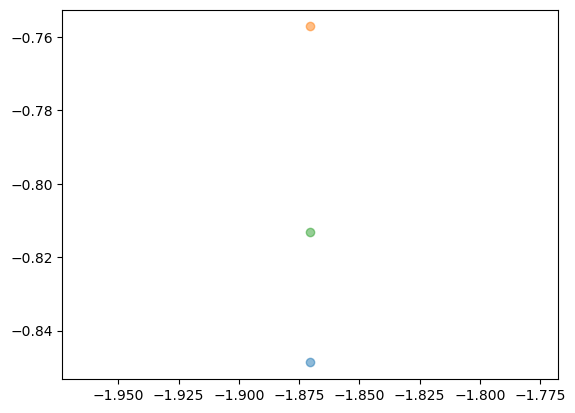

In [100]:
plt.scatter(t_reg[mask][idx], ctst_pred_reg[mask][idx], alpha=0.5, label='Cell Type Specific')
plt.scatter(t_reg[mask][idx], mult_pred_reg[mask][idx], alpha=0.5, label='Multitasking')
plt.scatter(t_reg[mask][idx], mult2_pred_reg[mask][idx], alpha=0.5, label='Multitasking2')

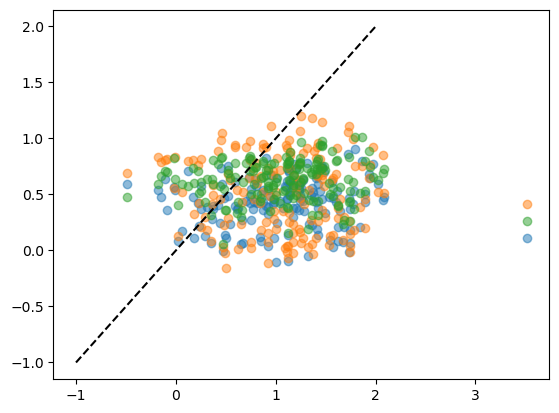

In [104]:
#no that's incorrect, mask linearizes it, let's do it this way
plt.scatter(t_reg[idx][mask[idx]], ctst_pred_reg[idx][mask[idx]], alpha=0.5, label='Cell Type Specific')
plt.scatter(t_reg[idx][mask[idx]], mult_pred_reg[idx][mask[idx]], alpha=0.5, label='Multitasking')
plt.scatter(t_reg[idx][mask[idx]], mult2_pred_reg[idx][mask[idx]], alpha=0.5, label='Multitasking2')
#and the 11 line
plt.plot([-1, 2], [-1, 2], 'k--')

In [105]:
t_reg[idx].shape

torch.Size([161])

In [106]:
t_reg[idx][mask[idx]].shape

torch.Size([161])

In [107]:
mask[100] #this one is all open, let's find some that are closed

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

In [108]:
idx = 9273
mask[idx]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

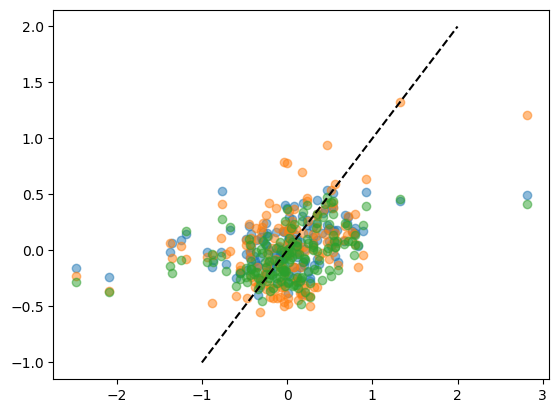

In [109]:
#no that's incorrect, mask linearizes it, let's do it this way
plt.scatter(t_reg[idx][mask[idx]], ctst_pred_reg[idx][mask[idx]], alpha=0.5, label='Cell Type Specific')
plt.scatter(t_reg[idx][mask[idx]], mult_pred_reg[idx][mask[idx]], alpha=0.5, label='Multitasking')
plt.scatter(t_reg[idx][mask[idx]], mult2_pred_reg[idx][mask[idx]], alpha=0.5, label='Multitasking2')
#and the 11 line
plt.plot([-1, 2], [-1, 2], 'k--')

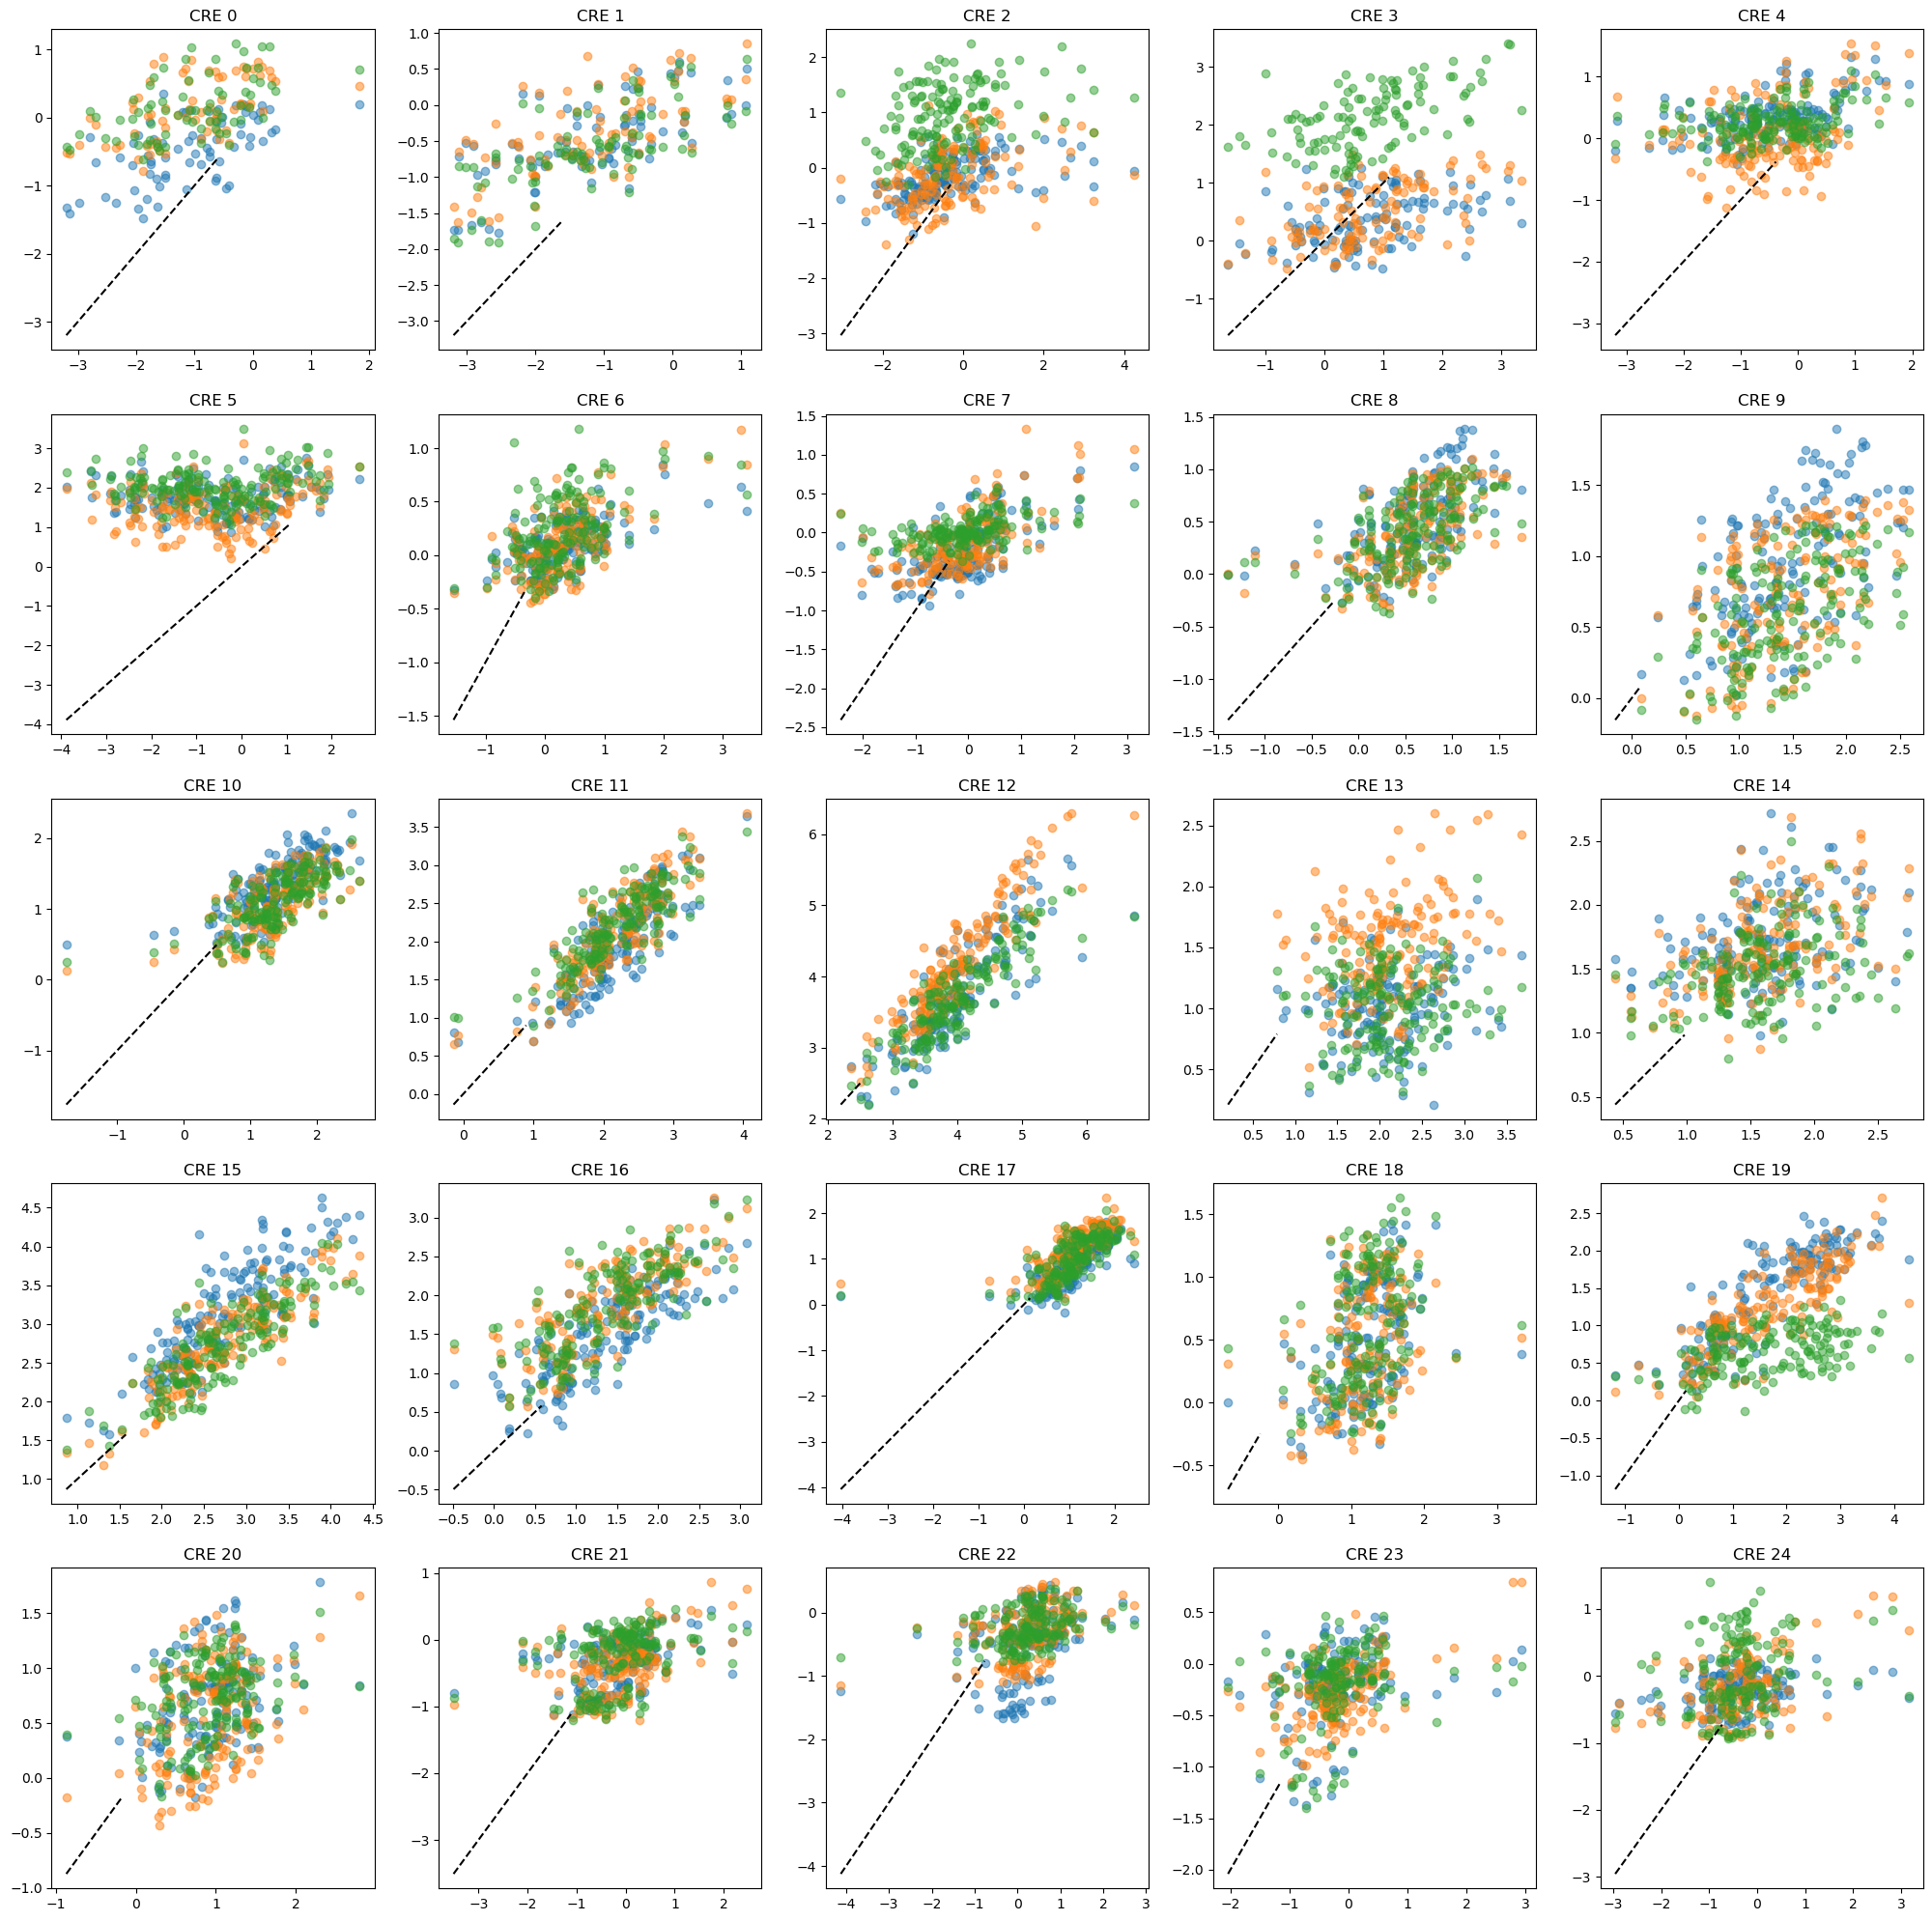

In [121]:
#we don't have the utility to easily find a dELS sequence, but that would be useful here...
#let's do a 5x5 grid of the scatter plots
plt.subplots(5, 5, figsize=(25,25))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.scatter(t_reg[idx][mask[idx]], ctst_pred_reg[idx][mask[idx]], alpha=0.5, label='Cell Type Specific')
    plt.scatter(t_reg[idx][mask[idx]], mult_pred_reg[idx][mask[idx]], alpha=0.5, label='Multitasking')
    plt.scatter(t_reg[idx][mask[idx]], mult2_pred_reg[idx][mask[idx]], alpha=0.5, label='Multitasking2')
    # torch.min(t_reg[idx][mask[idx]])
    minimum = min(torch.min(t_reg[idx][mask[idx]]).item(), torch.min(ctst_pred_reg[idx][mask[idx]]).item(), torch.min(mult_pred_reg[idx][mask[idx]]).item(), torch.min(mult2_pred_reg[idx][mask[idx]]).item())
    maximum = max(torch.max(t_reg[idx][mask[idx]]).item(), torch.max(ctst_pred_reg[idx][mask[idx]]).item(), torch.max(mult_pred_reg[idx][mask[idx]]).item(), torch.max(mult2_pred_reg[idx][mask[idx]]).item())
    plt.plot([minimum, maximum], [minimum, maximum], 'k--')
    plt.title(f'CRE {idx}')

In [115]:
torch.min(t_reg[idx][mask[idx]])

tensor(-3.1970)

In [120]:
torch.min(t_reg[idx][mask[idx]]).item(), torch.min(ctst_pred_reg[idx][mask[idx]]).item(), torch.min(mult_pred_reg[idx][mask[idx]]).item(), torch.min(mult2_pred_reg[idx][mask[idx]]).item()

(-3.1969776153564453,
 -1.481431484222412,
 -0.7808182239532471,
 -0.6178415417671204)

In [123]:
from shap_analysis.ism_utils import ISMUtils
path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-25/15-41-13-286486/checkpoints/last.ckpt'
ctstutils = ISMUtils('DNase_ctst', path,classification=True, split='test')

In [124]:
ctstutils.find_ccre_type(0)

'DNase-H3K4me3,CTCF-bound'

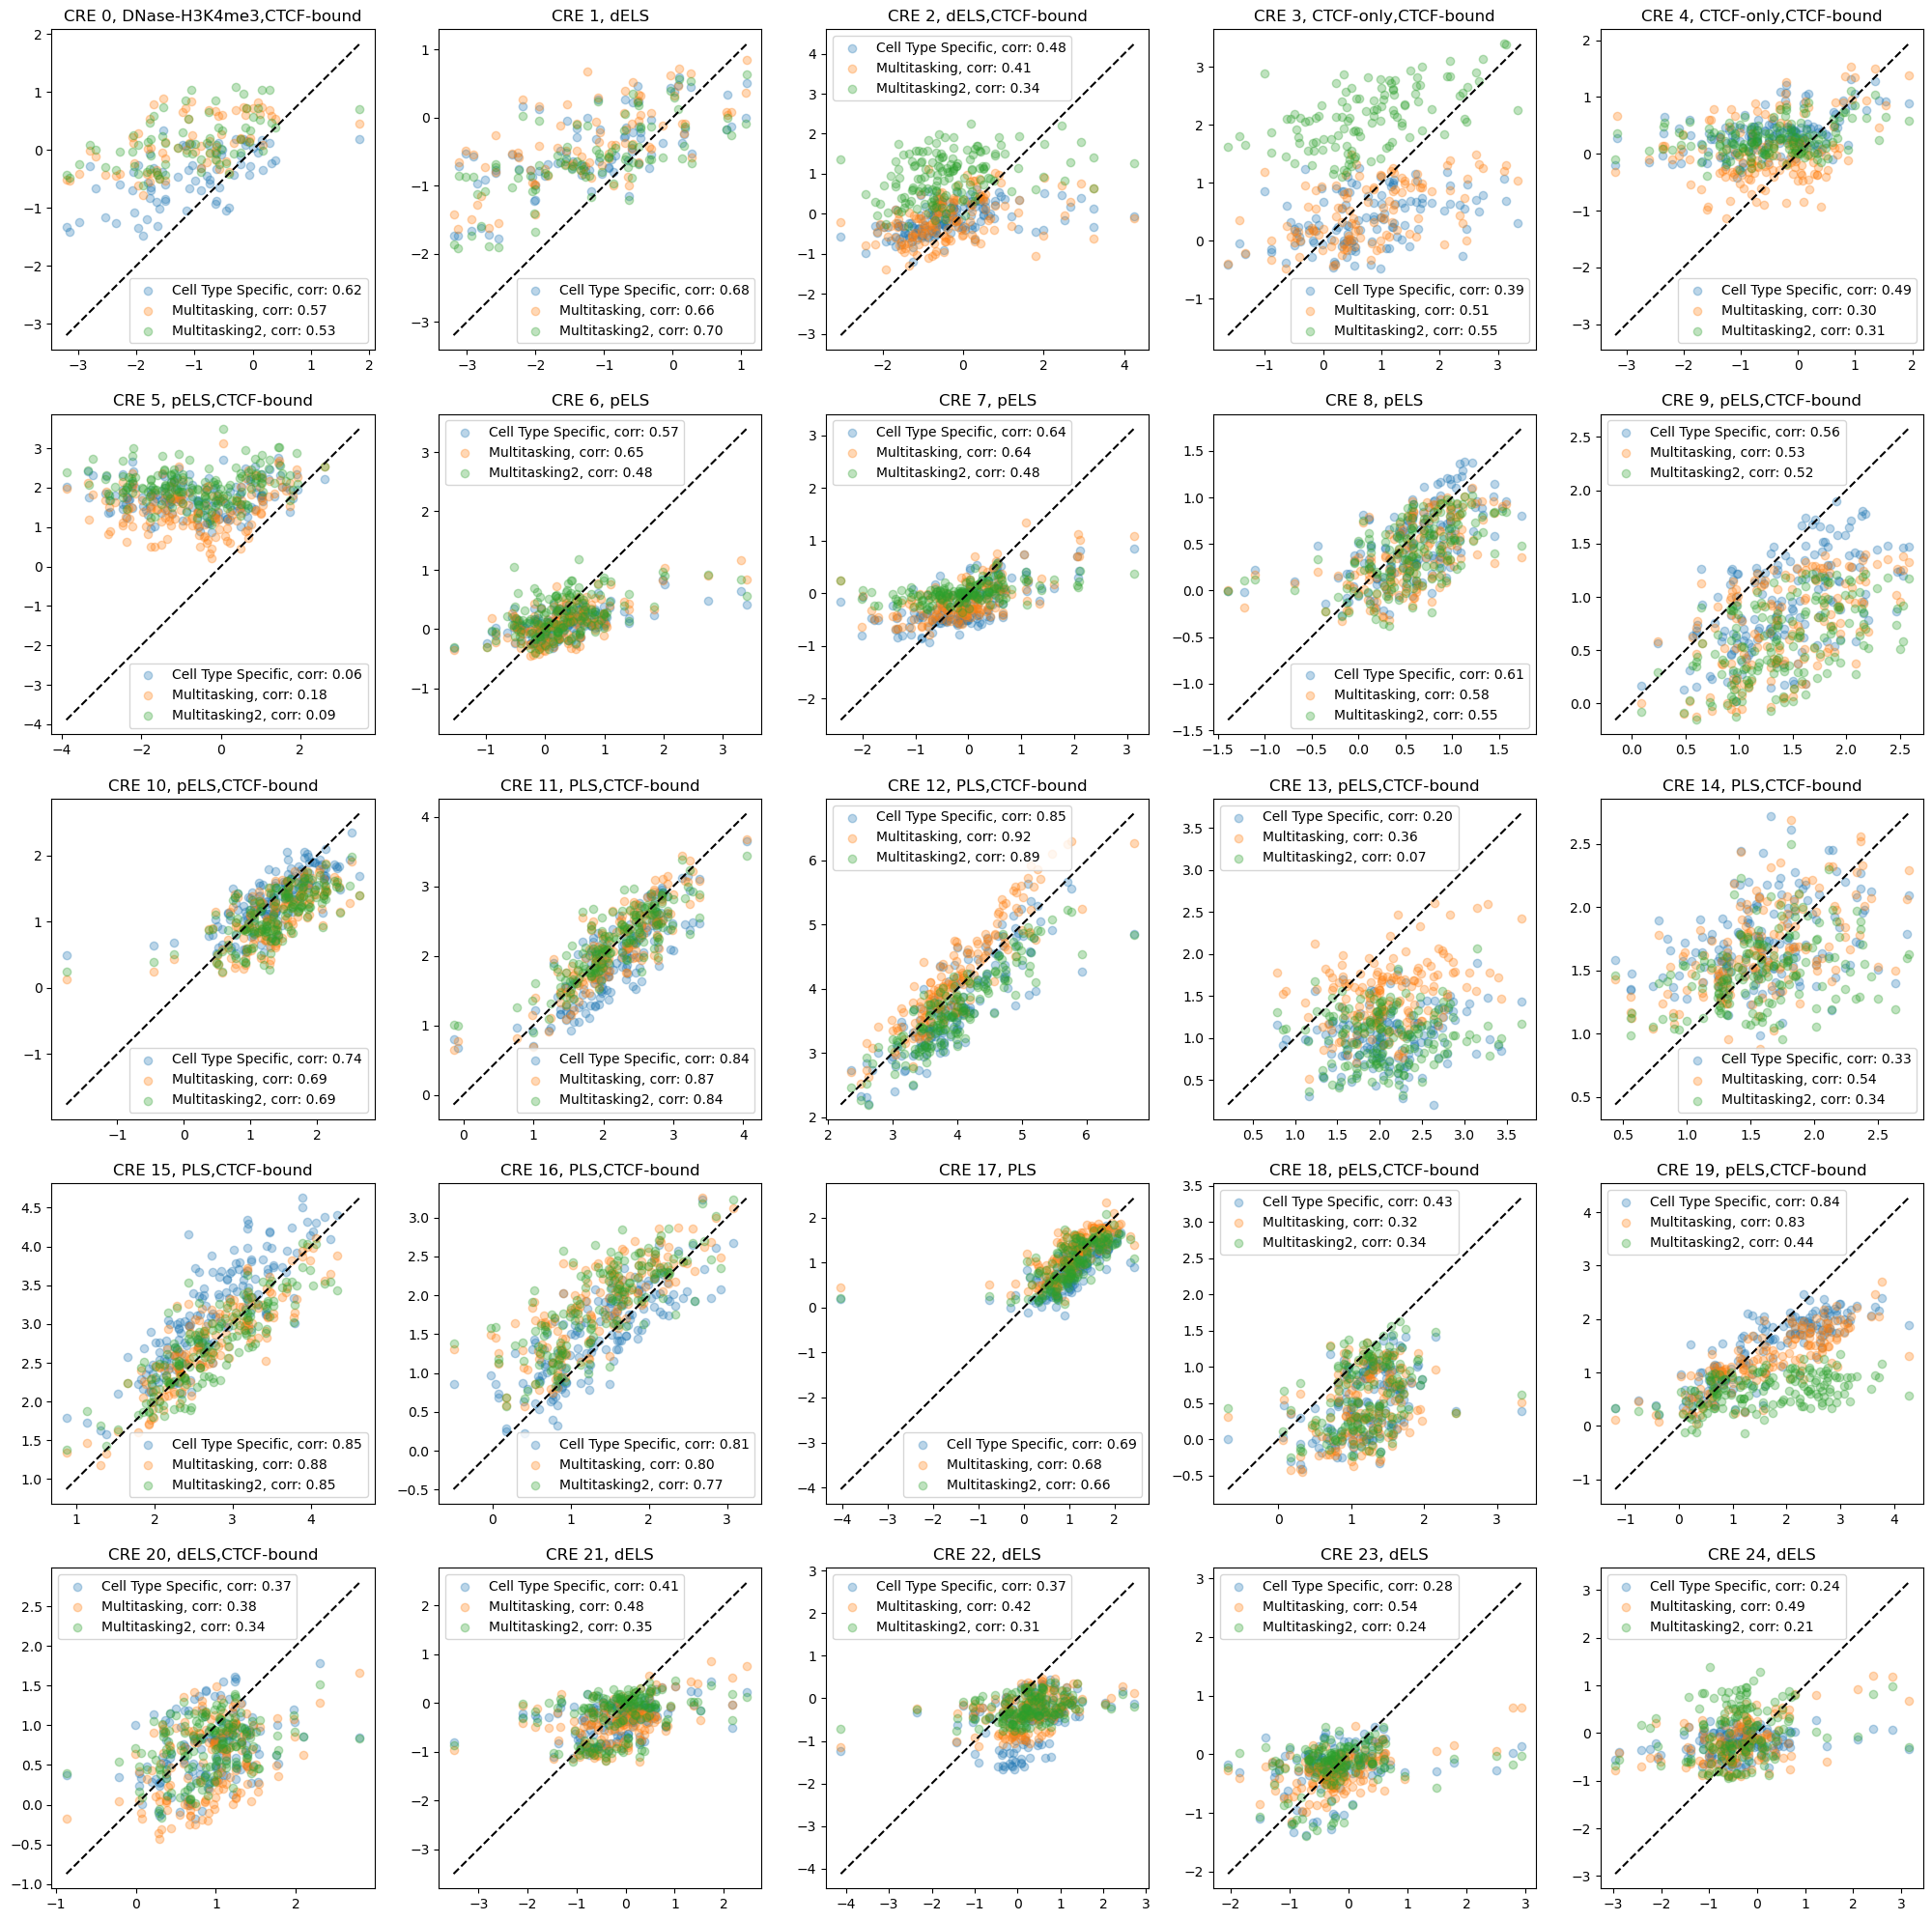

In [127]:
#we don't have the utility to easily find a dELS sequence, but that would be useful here...
#let's do a 5x5 grid of the scatter plots
plt.subplots(5, 5, figsize=(25,25))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.scatter(t_reg[idx][mask[idx]], ctst_pred_reg[idx][mask[idx]], alpha=0.3, label=f'Cell Type Specific, corr: {pearsonr(t_reg[idx][mask[idx]], ctst_pred_reg[idx][mask[idx]])[0]:.2f}')
    plt.scatter(t_reg[idx][mask[idx]], mult_pred_reg[idx][mask[idx]], alpha=0.3, label=f'Multitasking, corr: {pearsonr(t_reg[idx][mask[idx]], mult_pred_reg[idx][mask[idx]])[0]:.2f}')
    plt.scatter(t_reg[idx][mask[idx]], mult2_pred_reg[idx][mask[idx]], alpha=0.3, label=f'Multitasking2, corr: {pearsonr(t_reg[idx][mask[idx]], mult2_pred_reg[idx][mask[idx]])[0]:.2f}')
    # torch.min(t_reg[idx][mask[idx]])
    minimum = min(torch.min(t_reg[idx][mask[idx]]).item(), torch.min(ctst_pred_reg[idx][mask[idx]]).item(), torch.min(mult_pred_reg[idx][mask[idx]]).item(), torch.min(mult2_pred_reg[idx][mask[idx]]).item())
    maximum = max(torch.max(t_reg[idx][mask[idx]]).item(), torch.max(ctst_pred_reg[idx][mask[idx]]).item(), torch.max(mult_pred_reg[idx][mask[idx]]).item(), torch.max(mult2_pred_reg[idx][mask[idx]]).item())
    plt.plot([minimum, maximum], [minimum, maximum], 'k--')
    plt.title(f'CRE {idx}, {ctstutils.find_ccre_type(idx)}')
    plt.legend()

In [ ]:
#it's interesting, particularly for the distal enhancers, multitasking does much better in terms of predictions, but if we find ISM still better...
#now the next step is to start on this sort of pipeline to analyze the ism results
#we could also look at the distribution of ROC and PRC per row and col, but it is a lot of work...
#better to look at each cCRE because the z score is per biosample, so this is way better!

In [1]:
#look at the embeddings
import sys
print(sys.path)
from evals.evals_utils import Evals
ctst_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-25/15-41-13-286486/checkpoints/last.ckpt'
eval_ctst = Evals('DNase_ctst',ctst_path, classification=True)
#now we view the embeddings

['/lila/data/leslie/sarthak/hyena/hyena-dna', '/data/leslie/sarthak/environments/hyena_backup2/lib/python311.zip', '/data/leslie/sarthak/environments/hyena_backup2/lib/python3.11', '/data/leslie/sarthak/environments/hyena_backup2/lib/python3.11/lib-dynload', '', '/data/leslie/sarthak/environments/hyena_backup2/lib/python3.11/site-packages']


In [3]:
#let's now find the celltypes
celltypesfile = '/data/leslie/sarthak/data/cCRE_celltype_matrices/cell_types_filtered.txt'
#now load in the celltypes
celltypes = []
with open(celltypesfile) as f:
    for line in f:
        celltypes.append(line.strip())
celltypes

['8988T',
 'chorion_tissue',
 'COLO829',
 'GM03348',
 'AG08395',
 'AG08396',
 'AG20443',
 'germinal_center_tissue',
 'H54',
 'GM10248',
 'GM10266',
 'GM12891',
 'GM12892',
 'GM13976',
 'GM13977',
 'GM18507',
 'GM19238',
 'GM19239',
 'GM19240',
 'GM20000',
 'HEK293T',
 'hepatocyte',
 'HPDE6-E6E7',
 'HTR-8/SVneo',
 'HuH-7',
 'endothelial_cell_of_umbilical_vein_newborn',
 'CWRU1',
 'LNCaP_clone_FGC',
 'MCF-7',
 'D721Med',
 'D341Med',
 'epidermal_melanocyte',
 'C803',
 'osteoblast',
 'RWPE1',
 'SK-N-SH',
 'urothelium_cell_line',
 'A549',
 'AG04449',
 'AG04450',
 'AG09309',
 'AG09319',
 'AG10803',
 'fibroblast_of_the_aortic_adventitia_female',
 'BJ',
 'HS-27A',
 'HS-5',
 'stromal_cell_of_bone_marrow_male',
 'CMK',
 'GM04503',
 'GM04504',
 'GM06990',
 'GM12864',
 'GM12865',
 'GM12878',
 'H1',
 'H7',
 'amniotic_epithelial_cell',
 'brain_pericyte',
 'smooth_muscle_cell_of_the_brain_vasculature_female',
 'cardiac_fibroblast',
 'cardiac_muscle_cell',
 'fibroblast_of_the_conjunctiva',
 'choroid_p

In [4]:
#let's colorcode them
import numpy as np
colors = np.zeros(len(celltypes))
# colors.shape #161,
#if it starts with GM make it 1
for i, celltype in enumerate(celltypes):
    if celltype.startswith('GM'):
        colors[i] = 1
    elif celltype.startswith('AG'):
        colors[i] = 2
    elif 'fibroblast' in celltype:
        colors[i] = 3

In [5]:
import umap

In [7]:
eval_ctst.backbone

DNAEmbeddingModel(
  (backbone): LMBackbone(
    (embeddings): GPT2Embeddings(
      (word_embeddings): Embedding(180, 128)
    )
    (layers): ModuleList(
      (0): Block(
        (mixer): HyenaOperator(
          (activation): Identity()
          (dropout): Dropout(p=0.0, inplace=False)
          (out_proj): Linear(in_features=128, out_features=128, bias=True)
          (in_proj): Linear(in_features=128, out_features=384, bias=True)
          (short_filter): Conv1d(384, 384, kernel_size=(3,), stride=(1,), padding=(2,), groups=384)
          (filter_fn): HyenaFilter(
            (dropout): Dropout(p=0.0, inplace=False)
            (pos_emb): PositionalEmbedding()
            (implicit_filter): Sequential(
              (0): Linear(in_features=5, out_features=64, bias=True)
              (1): Sin()
              (2): Linear(in_features=64, out_features=64, bias=True)
              (3): Sin()
              (4): Linear(in_features=64, out_features=64, bias=True)
              (5): Sin(

In [9]:
eval_ctst.backbone.backbone.embeddings.word_embeddings

Embedding(180, 128)

In [10]:
eval_ctst.tokenizer._vocab_str_to_int

{'[CLS]': 0,
 '[SEP]': 1,
 '[BOS]': 2,
 '[MASK]': 3,
 '[PAD]': 4,
 '[RESERVED]': 5,
 '[UNK]': 6,
 'A': 7,
 'C': 8,
 'G': 9,
 'T': 10,
 'N': 11}

In [11]:
#first 12 indices are legit, the next 161 are useful, the rest are useless, so 7 useless ones
#let's get the embeddings
embeddings = eval_ctst.backbone.backbone.embeddings.word_embeddings.weight[12:12+161].detach().numpy()
print(embeddings.shape)

(161, 128)


In [12]:
#first let's do pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(embeddings)
print(pca_embeddings.shape)

(161, 2)


<Axes: >

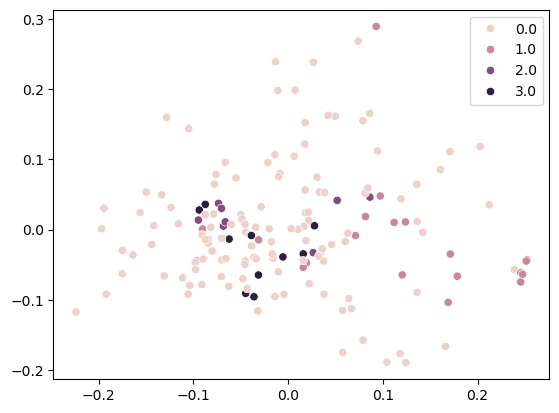

In [14]:
#now plot
import seaborn as sns
sns.scatterplot(x=pca_embeddings[:,0], y=pca_embeddings[:,1], hue=colors)

In [15]:
reducer = umap.UMAP()
embedding_umap = reducer.fit_transform(embeddings)
embedding2 = reducer.fit_transform(embeddings)
print(embedding2.shape)

(161, 2)


<Axes: >

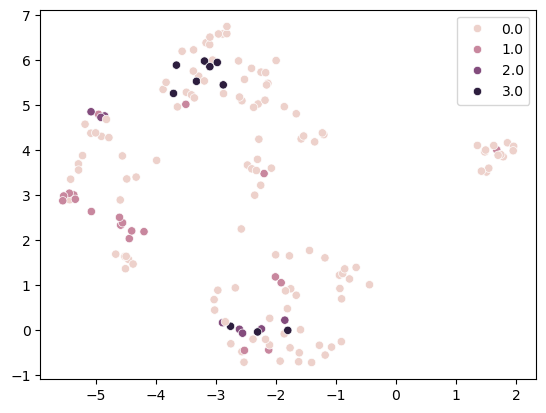

In [16]:
#and plot
sns.scatterplot(x=embedding2[:,0], y=embedding2[:,1], hue=colors)

In [17]:
#redo colors
colors = np.zeros(len(celltypes))
for i, celltype in enumerate(celltypes):
    if celltype.startswith('fibroblast'):
        colors[i] = 1
    elif celltype.startswith('cardiac'):
        colors[i] = 2
    # elif 'fibroblast' in celltype:
    #     colors[i] = 3

<Axes: >

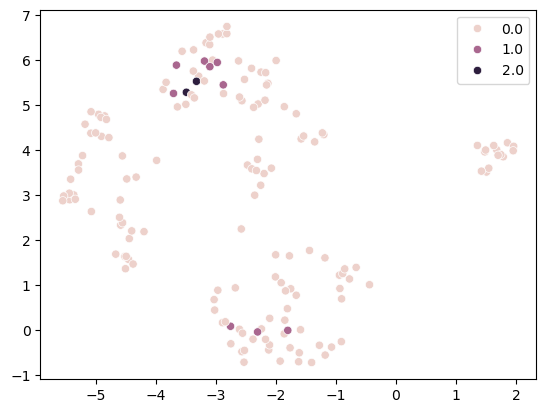

In [18]:
#umap plot
sns.scatterplot(x=embedding2[:,0], y=embedding2[:,1], hue=colors)

In [19]:
#let's adjust umap parameters
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3)
embedding3 = reducer.fit_transform(embeddings)
print(embedding3.shape)

(161, 2)


<Axes: >

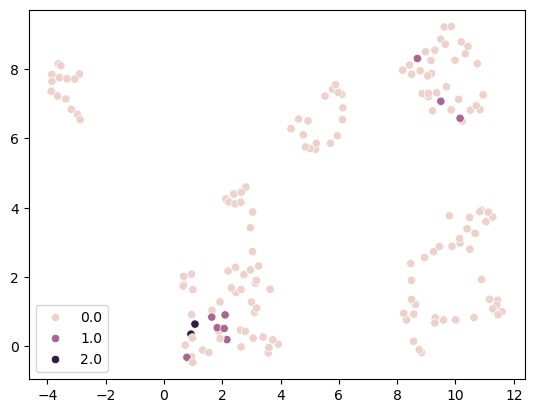

In [20]:
#and plot again
sns.scatterplot(x=embedding3[:,0], y=embedding3[:,1], hue=colors)

In [23]:
reducer = umap.UMAP(metric='cosine')
embedding4 = reducer.fit_transform(embeddings)
print(embedding4.shape)

(161, 2)


<Axes: >

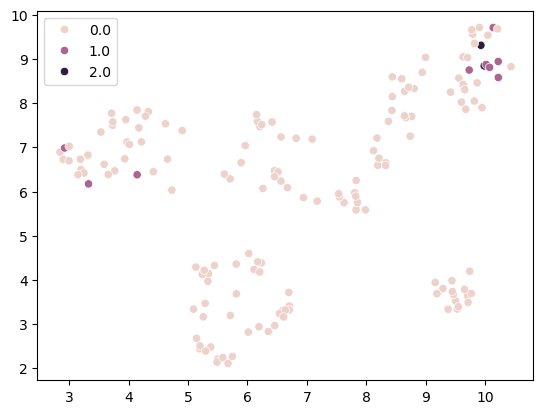

In [24]:
sns.scatterplot(x=embedding4[:,0], y=embedding4[:,1], hue=colors)

(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)
(161, 2)


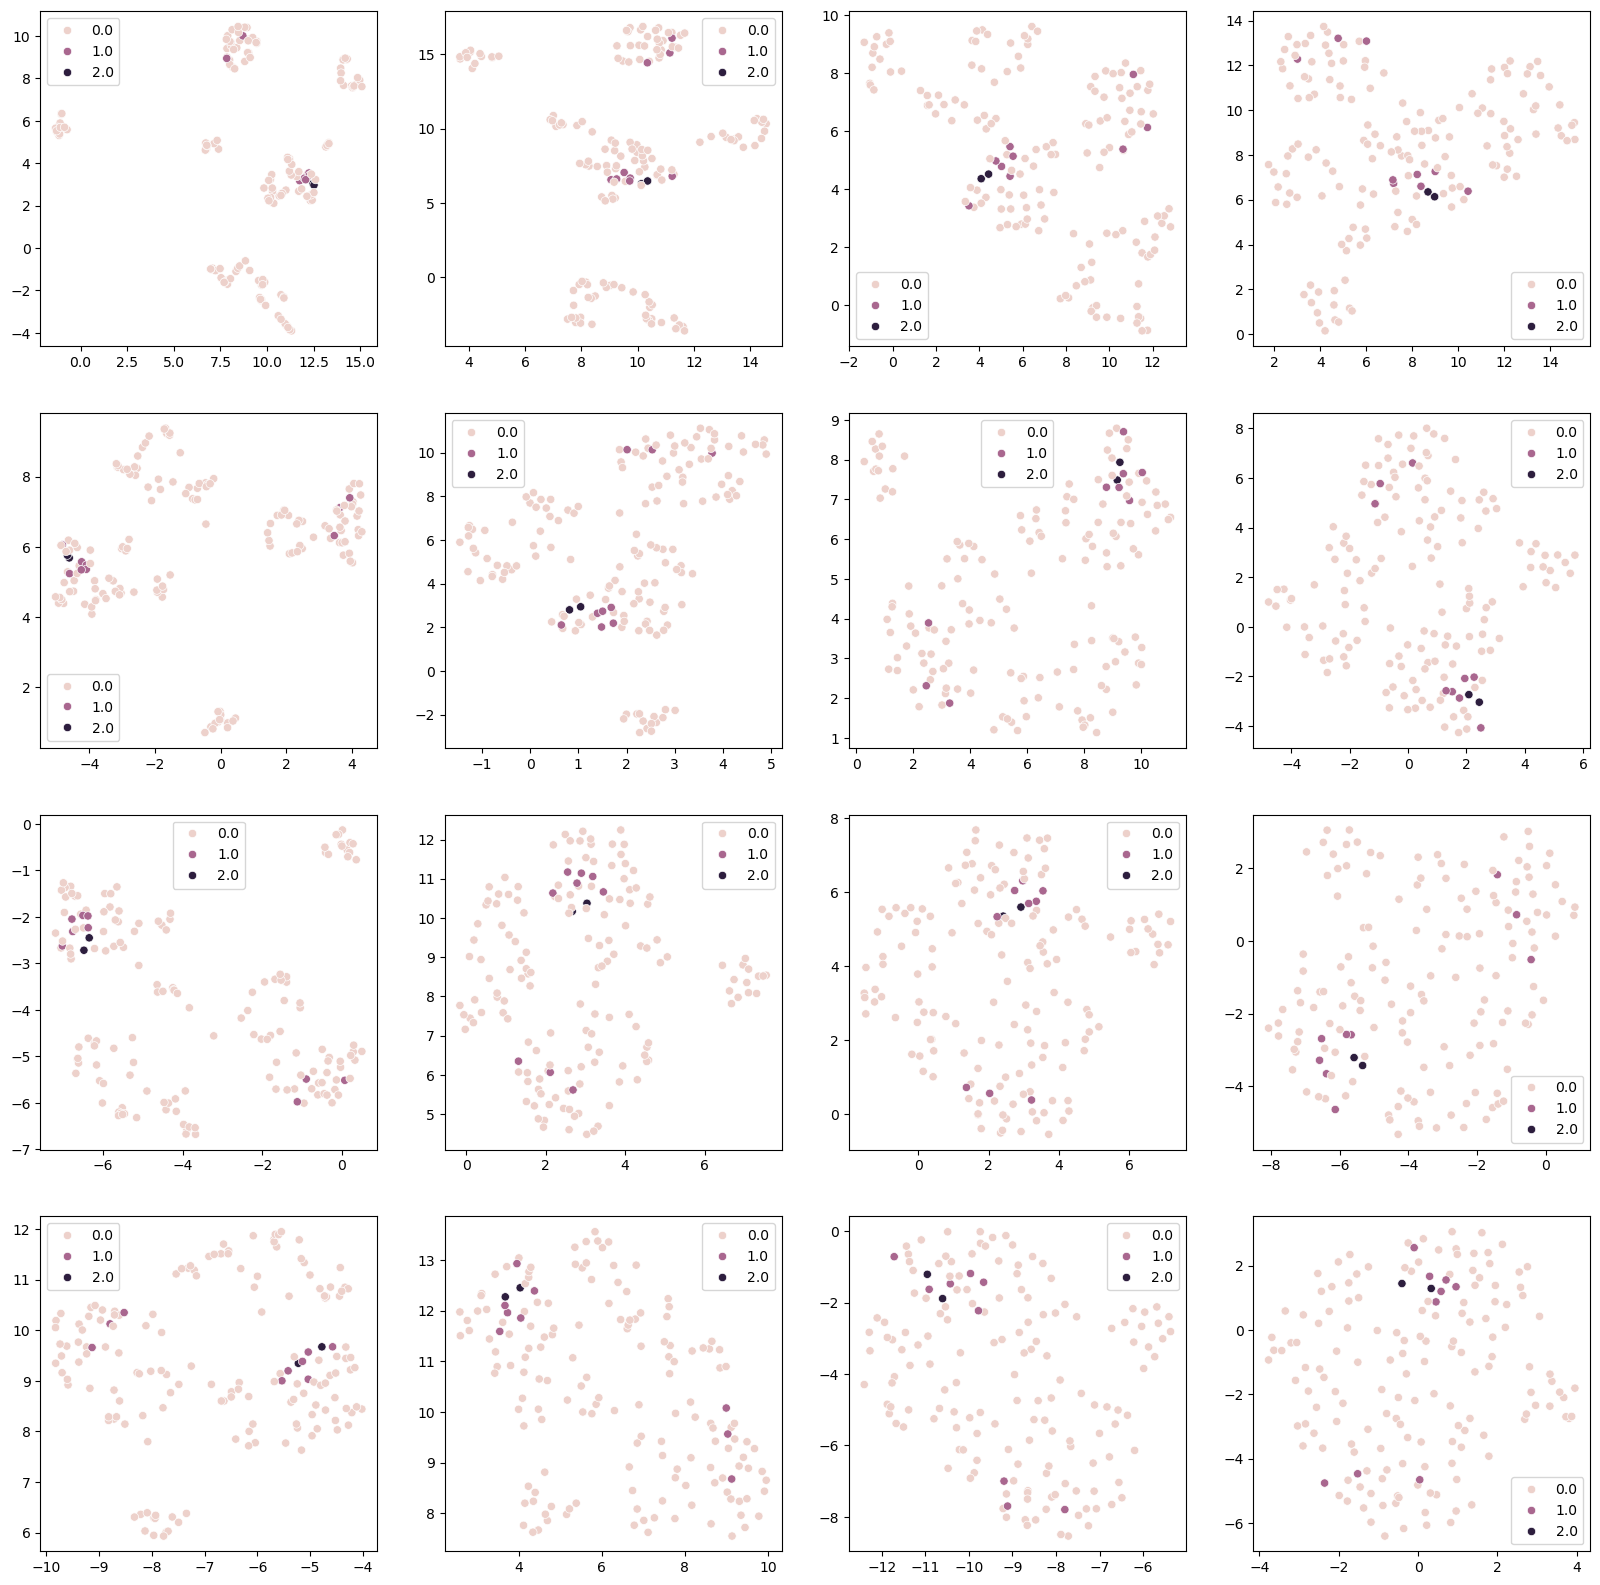

In [29]:
#pca isn't really used with cosine distances, because it relies on the geometry of the space, so euclidian is better
#let's try several parameters
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 4, figsize=(20,20))
neighbors = [5, 10, 15, 20]
min_dists = [0.1, 0.3, 0.5, 0.7]
for neighbor in neighbors:
    for min_dist in min_dists:
        reducer = umap.UMAP(n_neighbors=neighbor, min_dist=min_dist)
        embedding = reducer.fit_transform(embeddings)
        print(embedding.shape)
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=colors, ax=ax[neighbors.index(neighbor), min_dists.index(min_dist)])
        # plt.show()

(161, 2)


<Axes: >

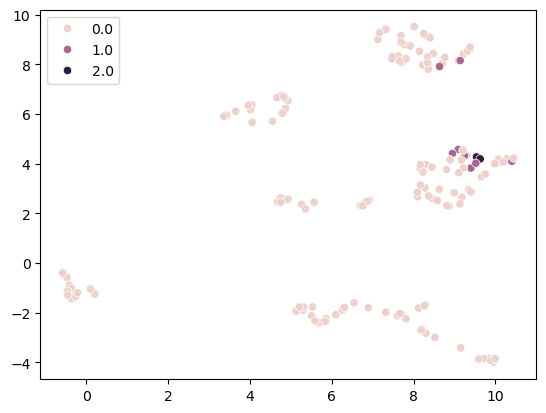

In [30]:
#let's stick with 5 and .1
reducer = umap.UMAP(n_neighbors=5, min_dist=0.1)
embedding = reducer.fit_transform(embeddings)
print(embedding.shape)
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=colors)

In [32]:
#let's see that group to the left of 2, so if x value less than 2 let's look at those indices
indices = np.where(embedding[:,0] < 2)
indices

(array([102, 105, 109, 111, 114, 115, 119, 121, 122, 139, 141, 154, 155,
        156]),)

In [36]:
indices[0]

array([102, 105, 109, 111, 114, 115, 119, 121, 122, 139, 141, 154, 155,
       156])

In [38]:
#index into celltype array with this
np.array(celltypes)[indices[0]]
#I have no clue how similar they are, my guess is not at all??

array(['BE2C', 'Caco-2', 'GM23338', 'endodermal_cell', 'WERI-Rb-1',
       'islet_precursor_cell', 'placenta_tissue_embryo', 'H9', 'RWPE2',
       'SJCRH30', 'SJSA1', 'HL-60', 'HAP-1', 'DND-41'], dtype='<U61')

# redo this and do proper annotations

In [1]:
#look at the embeddings
# import sys
# print(sys.path)
from evals.evals_utils import Evals
ctst_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-25/15-41-13-286486/checkpoints/last.ckpt'
eval_ctst = Evals('DNase_ctst',ctst_path, classification=True)
#now we view the embeddings

In [2]:
#let's now find the celltypes
celltypesfile = '/data/leslie/sarthak/data/cCRE_celltype_matrices/cell_types_filtered.txt'
#now load in the celltypes
celltypes = []
with open(celltypesfile) as f:
    for line in f:
        celltypes.append(line.strip())
celltypes

['8988T',
 'chorion_tissue',
 'COLO829',
 'GM03348',
 'AG08395',
 'AG08396',
 'AG20443',
 'germinal_center_tissue',
 'H54',
 'GM10248',
 'GM10266',
 'GM12891',
 'GM12892',
 'GM13976',
 'GM13977',
 'GM18507',
 'GM19238',
 'GM19239',
 'GM19240',
 'GM20000',
 'HEK293T',
 'hepatocyte',
 'HPDE6-E6E7',
 'HTR-8/SVneo',
 'HuH-7',
 'endothelial_cell_of_umbilical_vein_newborn',
 'CWRU1',
 'LNCaP_clone_FGC',
 'MCF-7',
 'D721Med',
 'D341Med',
 'epidermal_melanocyte',
 'C803',
 'osteoblast',
 'RWPE1',
 'SK-N-SH',
 'urothelium_cell_line',
 'A549',
 'AG04449',
 'AG04450',
 'AG09309',
 'AG09319',
 'AG10803',
 'fibroblast_of_the_aortic_adventitia_female',
 'BJ',
 'HS-27A',
 'HS-5',
 'stromal_cell_of_bone_marrow_male',
 'CMK',
 'GM04503',
 'GM04504',
 'GM06990',
 'GM12864',
 'GM12865',
 'GM12878',
 'H1',
 'H7',
 'amniotic_epithelial_cell',
 'brain_pericyte',
 'smooth_muscle_cell_of_the_brain_vasculature_female',
 'cardiac_fibroblast',
 'cardiac_muscle_cell',
 'fibroblast_of_the_conjunctiva',
 'choroid_p

In [3]:
import seaborn as sns
import umap

In [4]:
#first 12 indices are legit, the next 161 are useful, the rest are useless, so 7 useless ones
#let's get the embeddings
embeddings = eval_ctst.backbone.backbone.embeddings.word_embeddings.weight[12:12+161].detach().numpy()
print(embeddings.shape)

(161, 128)


In [5]:
#let's adjust umap parameters
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3)
embedding3 = reducer.fit_transform(embeddings)
print(embedding3.shape)

(161, 2)


In [18]:
#redo colors
import numpy as np
colors = np.zeros(len(celltypes))
for i, celltype in enumerate(celltypes):
    if celltype.startswith('fibroblast'):
        colors[i] = 1
    elif celltype.startswith('cardiac'):
        colors[i] = 2
    elif celltype.startswith('GM'):
        colors[i] = 3
    elif celltype.startswith('AG'):
        colors[i] = 4
    elif celltype.startswith('A'):
        colors[i] = 5
    elif celltype.startswith('H') and celltype[1].isdigit(): #this is an issue because has to be H and a number, lots of other types that start with H, give this thought and care
        colors[i] = 6
    elif 'T-' in celltype:
        colors[i] = 7
    elif 'epithelial' in celltype:
        colors[i] = 8
    elif 'endothelial' in celltype:
        colors[i] = 9
    #else it is automatically 0

In [19]:
# check how many are still 0
np.sum(colors == 0) #that's most of them...

91

<Axes: >

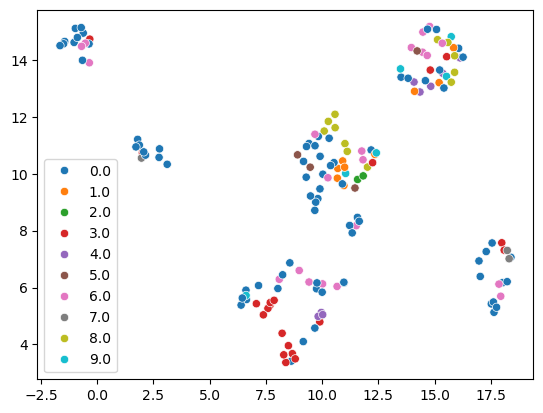

In [15]:
#now plot
reducer = umap.UMAP(n_neighbors=5, min_dist=0.1)
embedding3 = reducer.fit_transform(embeddings)
sns.scatterplot(x=embedding3[:,0], y=embedding3[:,1], hue=colors, palette='tab10')


<Axes: >

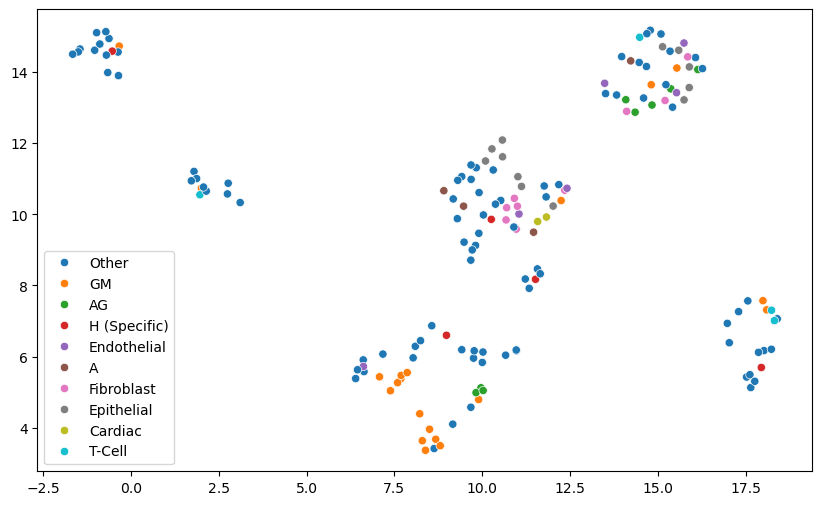

In [23]:
color_labels = {
    0: 'Other',
    1: 'Fibroblast',
    2: 'Cardiac',
    3: 'GM',
    4: 'AG',
    5: 'A',
    6: 'H (Specific)',
    7: 'T-Cell',
    8: 'Epithelial',
    9: 'Endothelial',
}

# Convert numeric 'colors' to corresponding labels for plotting
colors_categorical = [color_labels[color] for color in colors]
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plotting with categorical colors
sns.scatterplot(x=embedding3[:,0], y=embedding3[:,1], hue=colors_categorical, palette='tab10')


In [29]:
#print the ones with an x value of below 0.5
indices = np.where(embedding3[:,0] < 0.5)[0]
for i in indices:
    print(celltypes[i])

BE2C
Caco-2
GM23338
endodermal_cell
WERI-Rb-1
islet_precursor_cell
placenta_tissue_embryo
H9
RWPE2
SJCRH30
SJSA1
HL-60
HAP-1
DND-41
